# Investigação da energia de ligação entre átomos utilizando o potencial de Lennard-Jones.

* PET - Física UFRN
* Petiano: José Arthur de Luna Oliveira
* Data: 02 de Junho de 2023

Neste `Notebook` trataremos de um potencial bastante utilizado para descrever a interação entre átomos de gases, sólidos e líquidos na dinâmica molecular. Utilizaremos este potencial para ajudar a calcular numericamente a energia de ligação entre átomos de uma molécula diatômica pela regra de quantização de Bohr-Wilson-Sommerfeld e pela solução da equação de Schrödinger.

Declaro aqui que este `Notebook` é bastante baseado no desenvolvimento do artigo _O Potencial de Lennard-Jones: Aplicação À Moléculas Diatômicas_ **[1]**. Busco por meio deste projeto, trazer a abordagem em python do desenvolvimento feito no artigo.

Este `Notebook` está divido em 5 seções:
* **Introdução;**
* **Determinando a equação da energia de interação dos átomos;**
* **Solução;**
* **Comparando as duas soluções;**
* **Conclusão.**

## Importando as bibliotecas

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Detalhes das bibliotecas

In [2]:
%load_ext version_information
%version_information Matplotlib, Numpy

Software versions
Python 3.11.4 64bit [MSC v.1916 64 bit (AMD64)]
IPython 8.12.0
OS Windows 10 10.0.22621 SP0
Matplotlib 3.7.1
Numpy 1.24.3
Sun Nov 26 17:05:52 2023 Hora Padrão de Buenos Aires

## 1. Introdução

Em 1924, John Lennard-Jones propôs uma equação que possuia dois termos: o primeiro descreve a atração de longo alcance entre duas partículas, sendo proporcional a inverso da sexta potência da distância entre elas; já o segundo descreve a repulsão de curta distância entre essas mesmas duas partículas e é proporcional ao inverso da 12ª potência da distância.

$$U(r) = 4\epsilon_0\left[\left(\frac{\sigma}{r}\right)^{12} - \left(\frac{\sigma}{r}\right)^6\right]\text{ }, \tag{1.1}$$

* $U(r)$ é a energia potencial;

* $r$ é a distância entre as partículas;

* $\epsilon_0$ é a profundidade do poço de energia;

* $\sigma$ é uma constante com dimensão de comprimento.

### 1.1 Explicando os termos atrativos e repulsivos do potencial de Lennard-Jones

* **Termo Atrativo**: Considerando a interação entre dois átomos neutros, estes ainda podem apresentar um momento dipolar (mesmo que sejam neutros) devido ao movimento dos elétrons ao redor do núcleo, que acaba criando uma distribuição de cargas temporariamente assimétrica. Por conseguinte, acaba surgindo um dipolo elétrico momentâneo, e assim outros átomos ou moléculas próximas podem ser momentâneamente afetados por esses dipolos, resultando numa atração fraca entre eles. Essa atração é chamada de _força de Van der Waals_ **[1, 2]**. Tal nome é em homenagem ao físico holandês Johannes Diderik Van der Waals, que foi o primeiro a descrever a natureza dessas forças em 1873.

* **Termo Repulsivo**: a medida que as duas cargas de mesmo sinal aproximam-se, surge uma força de repulsão: a chamada força coulombiana. Além disso, existe o _Princípio de Exclusão de Pauli_ **[1, 2]**, o qual diz que alétrons não podem ter o mesmo estado quântico. Assim, quando dois átomos estão se aproximando, suas nuvens eletrônicas começam a se sobrepor, e essa sobreposição contribui na força repulsiva devido ao princípio de exclusão.

Como o potencial é descrito por um termo atrativo de longa distãncia e um termo repulsivo de curta distância, dessa forma haverá uma distância de equilíbrio $r_{min}$, dada quando o potencial chega no seu ponto mínimo. Quando isso acontece podemos considerar que houve a formação de uma molécula. Por conseguinte, pode-se perceber que se a energia potencial está diminuindo, significa dizer que estão se aproximando e formando uma molécula, e quando energia potencial está aumentando significa dizer que a molécula está se disassociando.

Como o $r_{min}$ é o ponto de equilíbrio (força resultante é igual a zero), e como são forças que dependem apenas da distância, ou seja, são conservativas ($F = -\nabla U(r)$). Assim, podemos encontrá-la da seguinte maneira,

$$\nabla U(r) = 0 \implies \frac{d}{dr}U(r) = 0 \quad. \tag{1.2}$$ 

Substituindo a equação **(1.1)** na **(1.2)**:

$$\frac{d}{dr}\left\{ 4\epsilon_0 \left[ \left(\frac{\sigma}{r}\right)^{12} - \left(\frac{\sigma}{r}\right)^6\right]\right\} = 0$$

$$4\epsilon_0\left[\frac{d}{dr}\left(\frac{\sigma}{r}\right)^{12} - \frac{d}{dr}\left(\frac{\sigma}{r}\right)^6 \right] = 0 \implies \frac{d}{dr}\left(\frac{\sigma}{r}\right)^{12} =\frac{d}{dr}\left(\frac{\sigma}{r}\right)^6$$

$$\implies -\sigma^{12}\frac{12}{r^{13}} = -\sigma^{6}\frac{6}{r^{7}} \implies r^6 = 2\sigma^6$$

$$\therefore \quad\boxed{r_{min} = 2^{1/6}\sigma} \tag{1.3}$$

Além do $r_{min}$, existem os pontos de retornos ($r_{in}$ e $r_{out}$), existem cada par desses pontos em cada nivel de energia para $E<0$, então podemos encontra-los pondo uma energia arbitrária $E$ e podemos encontrar os pontos de retorno nesse nivel de energia.

Assim escolhendo um nível de energia $E$ e igualando a equação **(1.1)**, teremos:

$$E = U(r)$$

$$\implies E = 4\epsilon_0\left[\left(\frac{\sigma}{r}\right)^{12} - (\frac{\sigma}{r})^6\right]\text{ }. \tag{1.4}$$

Faremos a seguinte substituição para simplificar o cálculo $\alpha = (\frac{\sigma}{r})^6$, logo teremos:

$$E = 4\epsilon_0(\alpha^2 - \alpha) \implies \alpha^2 - \alpha - \frac{E}{4\epsilon_0} = 0 \tag{1.5}$$

Agora nos restou a equação **(1.5)** que é apenas um polinômio de segundo grau, então só precisamos determinar as raízes dessa equação:

$$\alpha = \frac{1 \pm \sqrt{1+E/\epsilon_0}}{2} \implies \left(\frac{\sigma}{r}\right)^6 = \frac{1 \pm \sqrt{1+E/\epsilon_0}}{2}\quad\therefore\quad r = \sigma\left(\frac{2}{1 \pm \sqrt{1+E/\epsilon_0}}\right)^{1/6}$$

Dessa forma, temos que:

$$
\boxed{r_{in} = \sigma\left(\frac{2}{1 + \sqrt{1+E/\epsilon_0}}\right)^{1/6}}\qquad \text{e}\qquad \boxed{r_{out} = \sigma\left(\frac{2}{1 - \sqrt{1+E/\epsilon_0}}\right)^{1/6}} \quad \tag{1.6}.
$$

A medida que a energia aumenta a amplitude das oscilações dos átomos também aumentam, porém são limitadas aos pontos de retornos ($r_{in}$ e $r_{out}$). No entanto, quando $E > 0$, a distância entre os pontos de retorno é infinita, e dessa forma podemos inferir que a molécula está completamente dissociada.

Antes de plotarmos o gráfico, vamos primeiro criar uma função para melhorar a estética deles.

In [3]:
def plot_ticks():
    plt.figure(figsize = (8,5))
    plt.minorticks_on()
    plt.tick_params(axis='x', which='both', top = True, right = True, direction = 'in', length=5, width=1)
    plt.tick_params(axis='y', which='both', top = True, right = True, direction = 'in', length=5, width=1)

A seguir há uma plotagem do gráfico do potencial para exemplificar o que foi dito antes, considerei arbitráriamente $\sigma = 1$ e $\epsilon_0 = 1$.

Text(0, 0.5, '$U(r)$')

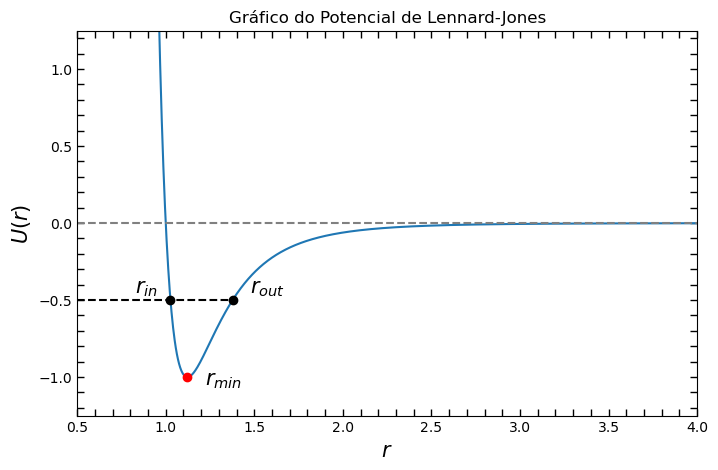

In [4]:
def U(r):
    epslon = 1
    sigma = 1
    return 4*epslon*((sigma/r)**12 - (sigma/r)**6)

#para calcular r_min
r_min = 2**(1/6)

#para calcular o r_in e r_out escolhi a energia de -0.5 J
r_in = (2/(1 + np.sqrt(1 - 0.5)))**(1/6)
r_out = (2/(1 - np.sqrt(1 - 0.5)))**(1/6)

x = np.linspace(0.95,4,1000)
plot_ticks()
plt.plot(x, U(x))
plt.axhline(y=0, color = 'gray', linestyle = '--')
plt.ylim(-1.25, 1.25)
plt.xlim(0.5,4)

#plotagem do ponto mínimo
plt.plot(r_min, min(U(x)), 'ro')
plt.text(r_min + 0.1, min(U(x)) - 0.05, '$r_{min}$', fontsize = 15)

#plotagem dos pontos de retornos
plt.axhline(y = -0.5,xmin = 0, xmax = 0.25, color = 'black', linestyle = '--')

plt.plot(r_in, -0.5, 'o', color = 'black')
plt.text(r_in - 0.2, -0.45, r"$r_{in}$", fontsize = 15)

plt.plot(r_out, -0.5, 'o', color = 'black')
plt.text(r_out + 0.1, -0.45, r"$r_{out}$", fontsize = 15)

plt.title("Gráfico do Potencial de Lennard-Jones")
plt.xlabel("$r$", fontsize = 15)
plt.ylabel(r'$U(r)$', fontsize = 15)

### 2. Determinando a equação da energia de interação dos átomos

Para podermos calcular descrever a energia de interação entre os átomos, primeiramente devemos definir o hamiltoniano do sistema, que pode ser expresso da seguinte maneira:

$$H = H_t + H_e + H_r + H_v  \quad \tag{2.1}. $$

Sabendo que:
* $H_t$ é hamiltoniano que descreve a translação;
* $H_e$ é o hamiltoniano que descreve o movimento dos elétrons;
* $H_r$ descreve o movimento da molécula em torno do seu centro de massa;
* $H_v$ está relacionado ao movimento vibracional dos átomos, em relação ao outro.

No que estamos trabalhando, precisaremos apenas do $H_v$, pois ela descreve o estado ligado da molécula.
Para descrever essa componente, devemos discutir a interação dos átomos. Então primeiramente, devemos discutir a interação atrativa, que pode ser descrita pela força de _Van der Waals_. Assim, vamos considerar dois átomos neutros separados por uma distância $R$, muito maior que o raio de nuclear de cada um deles. Como explicado na seção anterior, devido ao movimento constante dos elétrons, o átomo pode gerar um momento de dipolo $\vec{p}_1$ e cria um campo elétrico $E$ que extende-se por todo o espaço, e como é um campo elétrico gerado por um dipolo, então podemos descrevê-lo da seguinte forma:

$$\vec{E} = -\frac{1}{4\pi\epsilon_0}\left( \frac{\vec{p}_1}{R^3} - \frac{3\vec{R} \cdot \vec{p}_1}{R^5}\vec{R}\right) \quad .\tag{2.2}$$

Em seguida, o segundo átomo sob o efeito do campo elétrico do primeiro é polarizado e tem um momento dipolar $\vec{p}_2$. Dessa forma, podemos definir o momento induzido:

$$\vec{p}_2 = \alpha\vec{E} \tag{2.3}$$

Com a equação **(2.3)**, podemos encontrar o potencial, pois esse é um caso de um dipolo sujeito a um campo elétrico, que é expresso por:

$$U = - \vec{p}_2\cdot\vec{E} \tag{2.4}$$

Substituindo a equação **(2.3)** na equação **(2.4)**, teremos:

$$U = -\alpha \vec{E} \cdot \vec{E} \implies U = - \alpha E^2 \quad . $$

Então, substituindo a equação **(2.2)** na equação acima, teremos:

$$U = -\frac{\alpha}{16\pi^2\epsilon_0^2} \left( \frac{\vec{p}_{1}}{R^3} - \frac{3\vec{R}\cdot\vec{p}_1\cos{\theta}}{R^5}\vec{R}\right)^2 $$

Lembre-se: $\vec{A}\cdot\vec{B} = |A||B|\cos{\theta}$.

$$\implies U = -\frac{\alpha}{16\pi^2\epsilon_0^2} \left[ \left( \frac{p_{1x}}{R^3} - \frac{3Rp_1\cos{\theta}}{R^5}R_x\right)^2 + \left( \frac{p_{1y}}{R^3} - \frac{3Rp_1\cos{\theta}}{R^5}R_y\right)^2 + \left( \frac{p_{1z}}{R^3} - \frac{3Rp_1\cos{\theta}}{R^5}R_z\right)^2 \right] $$

$$\implies U = -\frac{\alpha}{16\pi^2\epsilon_0^2} \left[ \frac{1}{R^6}(p_{1x}^2 + p_{1y}^2 + p_{1z}^2) - \frac{6Rp_1\cos{\theta}}{R^8}(R_xp_{1x} + R_yp_{1y} + R_zp_{1z}) + \frac{9R^2p_1^2\cos^2{\theta}}{R^{10}}(R_x^2 + R_y^2 + R_z^2)\right]$$

$$\implies U = -\frac{\alpha}{16\pi^2\epsilon_0^2} \left[ \frac{p^2}{R^6} - \frac{6Rp_1\cos{\theta}}{R^8}(\vec{R}\cdot\vec{p}) + \frac{9R^2p_1^2\cos^2{\theta}}{R^{10}}R^2\right]$$

$$\implies U = -\frac{\alpha}{16\pi^2\epsilon_0^2} \left[ \frac{p^2}{R^6} - \frac{6p_1^2\cos^2{\theta}}{R^6} + \frac{9p_1^2\cos^2{\theta}}{R^{6}}\right]$$

$$\therefore \quad U(R) = -\alpha \left( \frac{1+3\cos^2{\theta}}{16\pi^2\epsilon_0^2}p_1^2 \right)\frac{1}{R^6} \quad .$$

Como o potencial é em função da distância, então:

$$\boxed{U(R) = \frac{\text{const.}}{R^6}} \quad . \tag{2.5}$$

O resultado **(2.5)** representa a parte atratitiva do _potencial de Lennard Jones_ (**L-J**).

Agora iremos discutir a respeito da interação repulsiva dos átomos. Como já explicitado na seção anterior, é causada pela força eletrostática de cargas de mesmo sinal e pelos _princípio de Exclusão de Pauli_ **[1, 2]**. Porém, essa interação foi determinada de maneira empírica, na qual foi baseada na análise de dados obtidos em experimentos com gases como: nitrogênio, hélio, hidrogênio, argônio e neônio **[2]**. Com isso, chegou-se a equação:

$$\boxed{U(R) = \frac{const}{R^{12}}} \quad .\tag{2.6}$$

A partir desses resultados **(2.5)** e **(2.6)**, agora sabemos como obter o potencial de interação entre os átomos de uma molécula e sua forma final (Equação **(1.1)**). Assim, podemos escrever o hamiltoniano vibracional como:

$$\boxed{H_v = \frac{p^2}{2m} + U(r)} \quad . \tag{2.7}$$

Por conseguinte, podemos descrever o movimento característico dos átomos.

## 3. Solução

Já explicitado o hamiltoniano vibracional, podemos determinar os estados ligados da uma molécula, e para isso devemos solucionar a equação. Dito isso, há duas maneiras de solucionar numericamente essa equação: pela regra de quantização de Bohr-Wilson-Sommerfeld e pela solução da equação de Schrödinger. E é o que iremos fazer nas próximas subseções seguintes.

### 3.1 Solucionando pela regra de quantização de Bohr-Wilson-Sommerfeld (BWM)

A antiga teoria quântica, também conhecida como teoria quântica pré-moderna, foi desenvolvida entre as décadas de 1900 e 1920, e consistiu em um período onde cientistas como Max Planck, Albert Einstein, Niels Bohr e Werner Heisenberg buscaram explicar as propriedades das partículas subatômicas.

A antiga teorica quântica deu origem ao modela atômico de Bohr, que propôs que os elétrons ao redor do núcleo do átomo se moviam em órbitas circulares, e que a energia dessas órbitas era quantizada, ou seja, só podiam assumir valores discretos de energia.

No entanto, o modelo de Bohr só conseguia explicar corretamente as propriedades espectrais de átomos com um elétron (Hidrogênio). Para átomos com mais elétrons, o modelo não conseguia descrever adequadamente as propriedades espectrais. Então, mais tarde Paul Wilson e Arnold Sommerfeld introduziram modificações ao modelo de Bohr, que ficou conhecido como modelo de Bohr-Wilson-Sommerfeld.

Uma das principais contribuições de Wilson e Sommerfeld foi a introdução da ideia de que as órbitas do elétrons tinham uma forma elíptica, e não circular. Além disso, introduziram a ideia de que os elétrons tinham um momento angular quantizado, que era expresso por um número inteiro chamado de número quântico do orbital.

Diante do que foi dito, a regra de quantização **BWS** introduz que o movimento em um sistema atômico é discreto, de tal forma
que o sistema obedece a mecânica clássica. Então podemos descrever as órbitas como:

$$\displaystyle \oint p_i \text{d}q_i = \left(n_i + \frac{1}{2}\right)h \quad , \tag{3.1}$$

na qual, $p_i$ são os momentos dos sistemas, $q_i$ são as coordenadas correspondentes, $n_i$ é um número inteiro, em que $n \in \mathbb{N}$, e a integral é tomada ao longo do período do movimento. A integral é uma área do espaço de fase, que é a quantidade chamada de ação, quantizada pela constante de Planck.

**OBS**: na referência **[1]** a equação **(3.1)** está com erro de digitação, e caso queiram ver a demonstração dessa integral, por favor vejam a referência **[11]**.

A energia total de um sistema é dada pela soma da energia cinética e da energia potencial, assim a energia total de sistema de dois núcleos que possuem um movimento periódico de aproximação e afastamento, considerando apenas uma dimensão, pode ser definida da mesma maneira:

$$ E = \frac{p^2}{2m} + U(x) \quad , \tag{3.2}$$

em que $p$ é o momento relativo dos núcleos, $m$ é a massa reduzida do sistema e $U(x)$ é o _pontecial de L-J_. Haverá infinitas trajetórias associadas a cada energia pertencente ao intervalo $-\epsilon_0 < E < 0$, e podemos descrevê-las por:


$$ p(x) = \pm \sqrt{2m[E - U(x)]} \quad . \tag{3.3}$$

Substituindo a equação **(3.3)** na **(3.1)**, temos:

$$J(E_n) = \displaystyle \oint \left\{2m\left[E_n - U(x) \right] \right\}^{1/2}dx = \left(n + \frac{1}{2}\right)h$$

$$ \implies J(E_n) = \frac{2\pi}{h}\sqrt{2m}\displaystyle \oint  \left[(E_n - U(x) \right]^{1/2}dx = \left(n + \frac{1}{2}\right)2\pi$$

Como temos temos dois valores para $p(x)$, então devemos multiplicar a integral por dois. Logo, teremos:

$$ \therefore \quad J(E_n) = 2\sqrt{\frac{2m}{\hbar^2}}\displaystyle \oint  \left[(E_n - U(x) \right]^{1/2}dx = \left(n + \frac{1}{2}\right)2\pi\tag{3.4}$$

Substituindo a equação **(1.1)** na equação **(3.4)**, teremos:

$$J(E_n) = \sqrt{\frac{2m}{\hbar^2}}\displaystyle \oint  \left\{E_n - 4\epsilon_0\left[\left(\frac{\sigma}{x}\right)^{12} - \left(\frac{\sigma}{x}\right)^6\right] \right\}^{1/2}dx = \left(n + \frac{1}{2}\right)\pi$$

$$ \therefore\quad J(E_n) = \sqrt{\frac{2m\epsilon_0}{\hbar^2}}\displaystyle \oint  \left\{\frac{E_n}{\epsilon_0} + 4\left[\left(\frac{\sigma}{x}\right)^6 - \left(\frac{\sigma}{x}\right)^{12} \right] \right\}^{1/2}dx =\left(n + \frac{1}{2}\right)\pi \tag{3.5}$$

Para simplificar as equações **(3.5)** e **(3.3)**, faremos as seguintes substituições:

- $y = \frac{x}{\sigma};$

- $\epsilon_n = \frac{E_n}{\epsilon_0}$;

- $\gamma = \sqrt{\frac{2m\epsilon_0\sigma^2}{\hbar^2}}$.

Logo, das equações **(3.5)** e **(3.3)** teremos:

$$ \boxed{J(E_n) = \gamma \int_{y_{in}}^{y_{out}} \left\{\epsilon_n + 4\left[\left(\frac{1}{y}\right)^6 - \left(\frac{1}{y}\right)^{12} \right] \right\}^{1/2}dy = \left(n + \frac{1}{2}\right)\pi,\quad onde \quad n = 0, 1, 2, ...} \quad ;  \tag{3.6}$$

$$ \boxed{p(x) = \pm \sqrt{2m\epsilon_0\left\{\epsilon_n + 4\left[\left(\frac{1}{y}\right)^6 - \left(\frac{1}{y}\right)^{12} \right] \right\}}} \quad . \tag{3.7}$$

O $\gamma$ define a natureza do sistema, na qual obtemos o limite clássico para $\gamma$ grande, e o limite quântico para $\gamma$ pequeno.

Além dessas equações, podemos também simplificar a equação **(1.6)**, e assim teremos as seguintes equações:

$$
\boxed{y_{in}(\epsilon_n) = \left(\frac{2}{1 + \sqrt{1+\epsilon_n}}\right)^{1/6}}\qquad \text{e}\qquad \boxed{y_{out}(\epsilon_n) = \left(\frac{2}{1 - \sqrt{1+\epsilon_n}}\right)^{1/6}} \quad \tag{3.8}.
$$

#### 3.1.1 Solucionando a integral numericamente

Para solucionar a integral **(3.6)** numericamente, seguiremos os passos listados abaixo:

* **1º Passo**: iremos escolher um valor inicial para $\epsilon_n$, com esse valor podemos calcular os pontos de retornos nesse nivel de energia com a equação **(3.8)**;


* **2º Passo**: em seguida usaremos esses valores como limites da integral de ação (parte esquerda da equação **(3.6)**);


* **3º Passo**: Calculada o valor da integral, devemos comparar com o lado direito da equação **(3.6)**, na qual começamos com o estado fundamental ($n=0$), para sabermos se atigimos a precisão desejada;


* **4º Passo**: Caso tal precisão não tenha sido atingida, devemos escolher outro valor para $\epsilon_n$ e em seguida repetir todo o processo, até atingirmos o nosso objetivo.

Depois de encontrada a energia para o estado fundamental, devemos em seguida calcular a energia para o primeiro estado exitado ($n=1$), e assim por diante.

Então, iremos primeiramente definir as funções que calcula os pontos de retorno em função do $\epsilon_n$, que serão as equações **(1.6)**.

In [5]:
def fy_in(eps_n):
    return  (complex(2/(1+np.sqrt(1+eps_n))).real)**(1/6)
def fy_out(eps_n):
    return (complex(2/(1-np.sqrt(1+eps_n))).real)**(1/6)

As funções vão retornar valores complexos, pois caso considerarmos apenas quantidades reais em algumas energias o programa dará erro, no entanto só precisaremos das partes reais.

Em seguida, iremos definir as funções para calcular a integral. Para calcular a integral, iremos utilizar o método da Regra de Simpson **[3, 4]**.

**OBS**: Neste `Notebook` estamos considerando $\sigma = 1$ e $\epsilon_0 = 1$.

In [6]:
def f(y, eps_n, gamma): #essa é a função que está sendo integrada
    return gamma*np.sqrt(complex(eps_n + 4*((1/y)**6 - (1/y)**(12)))).real

def S(eps_n, gamma): #essa função determinará a integral calulada pelo método de Simpson
    N = 100000
    a = fy_in(eps_n) #ponto de retorno Y_in
    b = fy_out(eps_n) #ponto de retorno Y_out
    h = (b-a)/N
    y = np.linspace(a,b,N)
    s_i, s_p = 0, 0
    
    s_0 = f(a, eps_n, gamma) + f(b, eps_n, gamma)
    for i in range(1, N-1):
        if i%2 == 0:
            s_p += f(y[i], eps_n, gamma)
        else:
            s_i += f(y[i], eps_n, gamma)
            
    return (h*(s_0 + 2*s_p + 4*s_i)/3).real

Depois de definidas essas funções, vamos montar o código para chamar as funções e determinar os estados ligados dos átomos.

In [7]:
m = 1.6735e-27 #massa do hidrogênio
gamma = 21.7 #gamma do hidrogênio
eps_n = -0.99 #valor inicial da energia
lista = [] # uma lista que iremos salvar a energia dos estados ligados
I = 1 # valor inicial da integral
n = 0 #nível do estado ligado

while eps_n < -0.02:
    pas = 0.01
    while abs(I - (n + 0.5)*np.pi) > 1e-6:
        I = S(eps_n, gamma)
        if I<(n + 0.5)*np.pi:
            eps_n += pas
        else:
            eps_n -= pas
            pas = pas/10
            eps_n += pas
    lista.append(eps_n)
    n += 1
    
eps_BWS_21_7 = np.array(lista) #array onde vai ficar salva todos as energias de ligação
print(eps_BWS_21_7)

[-0.7724469  -0.4226341  -0.19557449 -0.06774044 -0.01254221]


Note que variamos o valor de $\epsilon_n$ com um passo incial relativamente grande e quando o algoritmo percebe que o valor da integral excedeu ao resultado que queremos, ele volta um passo e diminui o tamanho do mesmo em dez vezes. O programa fará esse processo até convergir para o respectivo valor do estado ligado. Depois que encontra a energia de um estado ligado, o passo retornará ao tamanho inicial e fará o processo tudo de novo para encontrar o próximo estado ligado da molécula.

Depois que calculamos as energias dos estados ligados, plotaremos em seguida o gráfico do momento em cada estado de energia.

In [8]:
# Definindo a uma função para Equação (3.7)
eps_0 = 1 #profundidade do poço potencial
def p1(y, eps_n, m):
    global eps_0
    return  np.sqrt(complex(2*m*eps_0*(eps_n + 4*((1/y)**6 - (1/y)**12)))).real
def p2(y, eps_n, m):
    global eps_0
    return  -np.sqrt(complex(2*m*eps_0*(eps_n + 4*((1/y)**6 - (1/y)**12)))).real

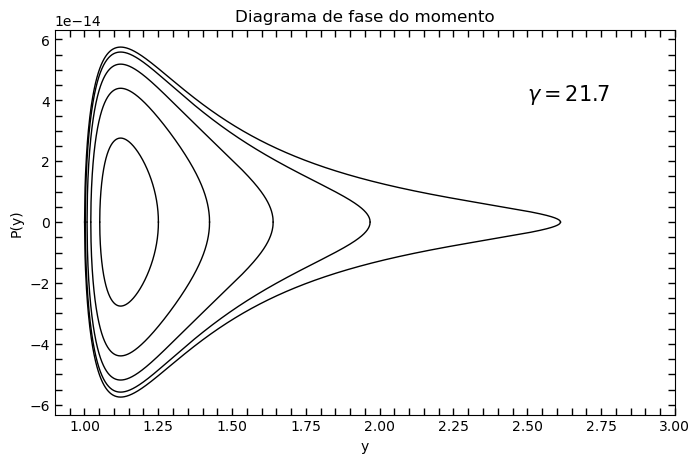

In [9]:
plot_ticks()
for i in range(len(eps_BWS_21_7)):
    eps_n = eps_BWS_21_7[i]
    r = np.linspace(fy_in(eps_n), fy_out(eps_n), 1000)
    p_1 = np.zeros(1000)
    p_2 = np.zeros(1000)
    for j in range(1000):
        p_1[j] = p1(r[j], eps_n, m)
        p_2[j] = p2(r[j], eps_n, m)
    plt.plot(r, p_1, color = 'black', linewidth=1)
    plt.plot(r, p_2, color = 'black', linewidth=1)

plt.title('Diagrama de fase do momento')
plt.xlabel('y')
plt.ylabel('P(y)')
plt.text(2.5, 4e-14, r"$\gamma = 21.7$", fontsize = 15)
plt.xlim(0.9, 3)
plt.show()

Agora faremos esse mesmo procedimento com $\gamma = 50, 100, 150$ e $200$.

Para os $\gamma = 50, 100$ e $200$, criaremos átomos fictícios (átomo 1, 2 e 3), e para fazermos os cálculos para estes átomos devemos descobrir suas respectivas massas, e para isso usaremos a relação matemática $\gamma = \sqrt\frac{2m\sigma^2}{\hbar^2}$. Assim, $m_1 = 1,39\times 10^{-65} kg$, $m_2 = 5,56\times 10^{-65} kg$ e $m_3 = 2,11\times 10^{-64} kg$. E $\gamma = 150$ é de um átomo de oxigênio.

**Então, iremos agora encontrar os estados ligado para o átomo fictício 1.**

In [10]:
gamma = 50 #gamma do átomo fictício 1
eps_n = -0.99
lista = []
I = 1
n = 0

while eps_n < -0.02:
    pas = 0.01
    while abs(I - (n + 0.5)*np.pi) > 1e-6:
        I = S(eps_n, gamma)
        if I<(n + 0.5)*np.pi:
            eps_n += pas
        else:
            eps_n -= pas
            pas = pas/10
            eps_n += pas
    lista.append(eps_n)
    n += 1
eps_BWS_50 = np.array(lista)
print(eps_BWS_50)

[-0.8966705  -0.71090409 -0.55165508 -0.41724606 -0.30591266 -0.21579655
 -0.14493724 -0.09126673 -0.05260301 -0.02664725 -0.01098332]


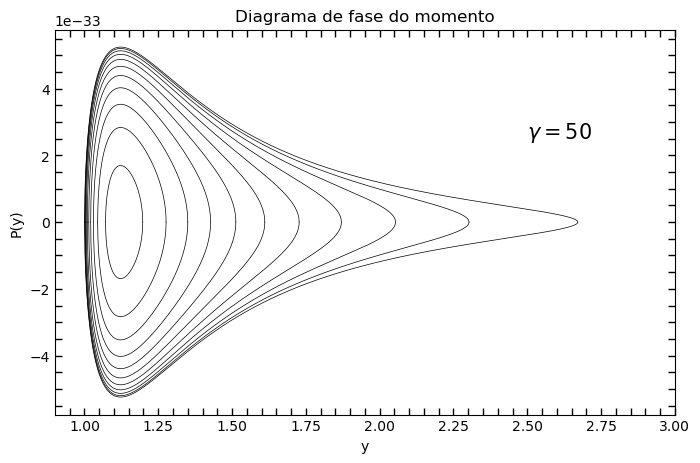

In [11]:
m = 1.39e-65 # massa do átomo fictício 1
plot_ticks()
for i in range(len(eps_BWS_50)):
    eps_n = eps_BWS_50[i]
    r = np.linspace(fy_in(eps_n), fy_out(eps_n), 1000)
    p_1 = np.zeros(1000)
    p_2 = np.zeros(1000)
    for j in range(1000):
        p_1[j] = p1(r[j], eps_n, m)
        p_2[j] = p2(r[j], eps_n, m)
    plt.plot(r, p_1, color = 'black', linewidth=0.5)
    plt.plot(r, p_2, color = 'black', linewidth=0.5)

plt.title('Diagrama de fase do momento')
plt.xlabel('y')
plt.ylabel('P(y)')
plt.text(2.5, 2.5e-33, r"$\gamma = 50$", fontsize = 15)
plt.xlim(0.9, 3)    
plt.show()

**Em seguida, vamos determinar os estados ligados para o átomo fictício 2.**

In [12]:
gamma = 100 #gamma do átomo fictício 2
eps_n = -0.99
lista = []
I = 1
n = 0

while eps_n < -0.02:
    pas = 0.01
    while abs(I - (n + 0.5)*np.pi) > 1e-6:
        I = S(eps_n, gamma)
        if I<(n + 0.5)*np.pi:
            eps_n += pas
        else:
            eps_n -= pas
            pas = pas/10
            eps_n += pas
    lista.append(eps_n)
    n += 1
eps_BWS_100 = np.array(lista)
print(eps_BWS_100)

[-0.94744449 -0.84765419 -0.75479597 -0.66866977 -0.58907155 -0.51579138
 -0.44861446 -0.38732032 -0.3316827  -0.28146937 -0.23644184 -0.1963552
 -0.16095785 -0.12999133 -0.10319015 -0.08028162 -0.06098573 -0.0450151
 -0.03207498 -0.02186331 -0.01407086]


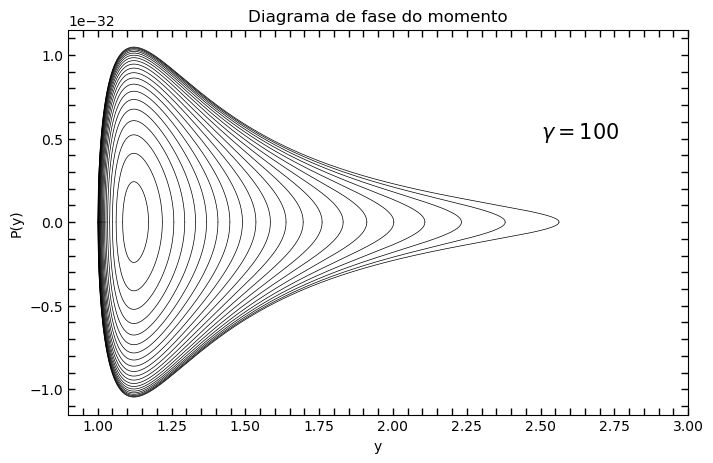

In [13]:
m = 5.56e-65 # massa do átomo fictício 2
plot_ticks()
for i in range(len(eps_BWS_100)):
    eps_n = eps_BWS_100[i]
    r = np.linspace(fy_in(eps_n), fy_out(eps_n), 1000)
    p_1 = np.zeros(1000)
    p_2 = np.zeros(1000)
    for j in range(1000):
        p_1[j] = p1(r[j], eps_n, m)
        p_2[j] = p2(r[j], eps_n, m)
    plt.plot(r, p_1, color = 'black', linewidth=0.5)
    plt.plot(r, p_2, color = 'black', linewidth=0.5)

plt.title('Diagrama de fase do momento')
plt.xlabel('y')
plt.ylabel('P(y)')
plt.text(2.5, 0.5e-32, r"$\gamma = 100$", fontsize = 15)
plt.xlim(0.9, 3)    
plt.show()

**Agora iremos fazer a mesma coisa para o átomo de oxigênio.**

In [14]:
gamma = 150 #gamma do átomo de oxigênio
eps_n = -0.99
lista = []
I = 1
n = 0
while eps_n < -0.02:
    pas = 0.01
    while abs(I - (n + 0.5)*np.pi) > 1e-6:
        I = S(eps_n, gamma)
        if I<(n + 0.5)*np.pi:
            eps_n += pas
        else:
            eps_n -= pas
            pas = pas/10
            eps_n += pas
    lista.append(eps_n)
    n += 1
eps_BWS_150 = np.array(lista)
print(eps_BWS_150)

[-0.9647637  -0.8966705  -0.83170185 -0.76979938 -0.71090405 -0.65495584
 -0.60189353 -0.55165499 -0.50417727 -0.45939597 -0.41724604 -0.37766075
 -0.34057259 -0.30591275 -0.27361118 -0.24359661 -0.21579647 -0.1901369
 -0.16654264 -0.14493716 -0.1252425  -0.10737924 -0.09126673 -0.07682243
 -0.06396294 -0.05260302 -0.04265605 -0.03403395 -0.02664725 -0.02040502
 -0.01521482]


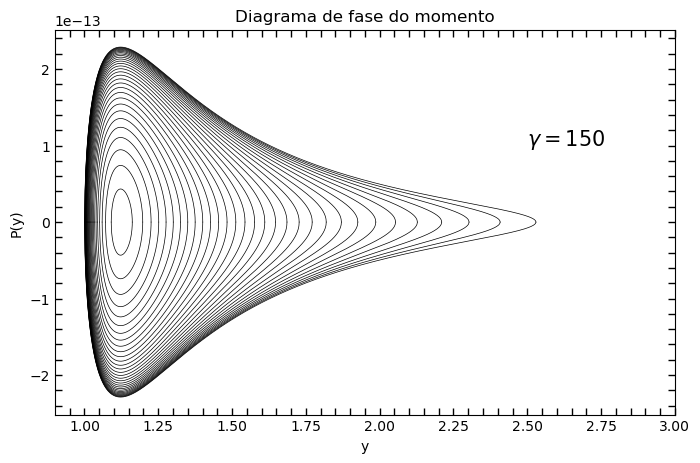

In [15]:
m = 2.6566962e-26 # massa do oxigênio
plot_ticks()
for i in range(len(eps_BWS_150)):
    eps_n = eps_BWS_150[i]
    r = np.linspace(fy_in(eps_n), fy_out(eps_n), 1000)
    p_1 = np.zeros(1000)
    p_2 = np.zeros(1000)
    for j in range(1000):
        p_1[j] = p1(r[j], eps_n, m)
        p_2[j] = p2(r[j], eps_n, m)
    plt.plot(r, p_1, color = 'black', linewidth=0.5)
    plt.plot(r, p_2, color = 'black', linewidth=0.5)

plt.title('Diagrama de fase do momento')
plt.xlabel('y')
plt.ylabel('P(y)')
plt.text(2.5, 1e-13, r"$\gamma = 150$", fontsize = 15)
plt.xlim(0.9, 3)    
plt.show()

**Agora para o átomo fictício 3.**

In [16]:
gamma = 200 #gamma do átomo fictício 3
eps_n = -0.99
lista = []
I = 1
n = 0

while eps_n < -0.02:
    pas = 0.01
    while abs(I - (n + 0.5)*np.pi) > 1e-6:
        I = S(eps_n, gamma)
        if I<(n + 0.5)*np.pi:
            eps_n += pas
        else:
            eps_n -= pas
            pas = pas/10
    lista.append(eps_n)
    n += 1
eps_BWS_200 = np.array(lista)
print(eps_BWS_200)

[-0.973497   -0.9218362  -0.87194426 -0.82379746 -0.77737151 -0.73264119
 -0.68958134 -0.64816641 -0.60837061 -0.57016747 -0.53353075 -0.49843348
 -0.46484846 -0.43274814 -0.4021046  -0.37288957 -0.34507439 -0.31863004
 -0.2935271  -0.26973578 -0.24722583 -0.22596668 -0.20592729 -0.18707623
 -0.16938159 -0.15281109 -0.13733198 -0.12291108 -0.10951475 -0.09710891
 -0.08565911 -0.07513006 -0.06548662 -0.05669272 -0.04871212 -0.04150764
 -0.0350423  -0.02927825 -0.02417724 -0.01970062]


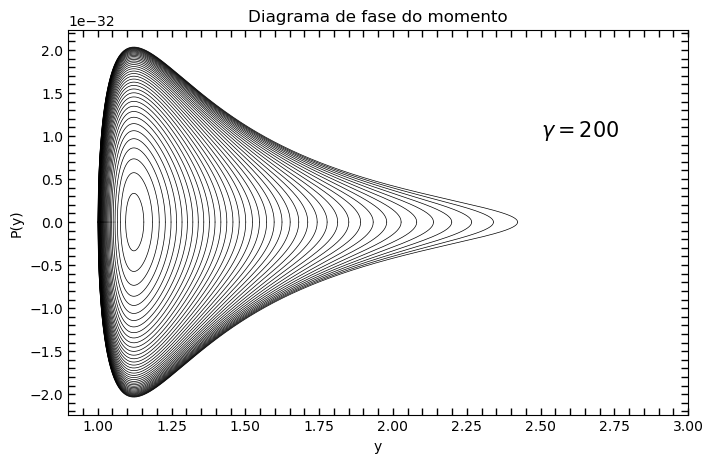

In [17]:
m = 2.11e-64 # massa do átomo fictício 3
plot_ticks()
for i in range(len(eps_BWS_200)):
    eps_n = eps_BWS_200[i]
    r = np.linspace(fy_in(eps_n), fy_out(eps_n), 1000)
    p_1 = np.zeros(1000)
    p_2 = np.zeros(1000)
    for j in range(1000):
        p_1[j] = p1(r[j], eps_n, m)
        p_2[j] = p2(r[j], eps_n, m)
    plt.plot(r, p_1, color = 'black', linewidth=0.5)
    plt.plot(r, p_2, color = 'black', linewidth=0.5)

plt.title('Diagrama de fase do momento')
plt.xlabel('y')
plt.ylabel('P(y)')
plt.text(2.5, 1e-32, r"$\gamma = 200$", fontsize = 15)
plt.xlim(0.9, 3)    
plt.show()

Fica claro perceber que quanto maior o $\gamma$, menos espaçados ficam os níveis de energia. Além disso, podemos ver que níveis de energia mais próximos ao poço do potencial tem curvas que tendem a uma elipse, e que para essas energias podemos notar que sempre haverá um movimneto harmônico dos átomos. A medida que a energia aumenta, se aproximando de zero, esse comportamento vai deixando de ser harmônico. E quando a energia chegar a zero (a molécula está dissociada) as curvas do momento irão convergir.

### 3.2 Solucionando pela solução da equação de Schrödinger

O físico austríaco Erwin Schrödinger em 1925, desenvolveu uma equação muito importante para física quântica que descreve como uma função de onda evolui ao longo do tempo. Tal função descreve a probabilidade de encontrar uma partícula em um determinado ponto no espaço. A _equação de Schrödinger_ permite calcular as propriedades quânticas de sistemas físicos, como o comportamento de átomos, moléculas e partículas subatômicas.

Como estamos interessados nos estados vibracionais com energia $E_n$, que podemos descrever em relações a autofunções $\psi_n(x)$, nas quais são soluções da _equação de Schrödinger_. Então podemos usar a equação de Schrödinger independente do tempo **[6]** para este objetivo:

$$-\frac{\hbar^2}{2m} \frac{d^2\psi_n(x)}{dx^2} + U(x)\psi_n(x) = E_n\psi_n(x) \quad , \tag{3.9}$$

em que $U(x)$ é o potencial **L-J**,

$$\left\{-\frac{\hbar^2}{2m} \frac{d^2}{dx^2} + 4\epsilon_0\left[ \left(\frac{\sigma}{x}\right)^{12} - \left(\frac{\sigma}{x}\right)^6\right] \right\}\psi_n(x) = E_n\psi_n(x) \quad . \tag{3.10}$$

Para solucionar essa equação computacionalmente faremos algumas manipulações algébricas,

$$\left\{-\frac{\hbar^2}{2m} \frac{d^2}{dx^2} + 4\epsilon_0\left[ \left(\frac{\sigma}{x}\right)^{12} - \left(\frac{\sigma}{x}\right)^6\right] - E_n\right\}\psi_n(x) = 0$$

$$ \implies \epsilon_0\left\{-\frac{\hbar^2}{2m\epsilon_0} \frac{d^2}{dx^2} + 4\left[ \left(\frac{\sigma}{x}\right)^{12} - \left(\frac{\sigma}{x}\right)^6\right] - \frac{E_n}{\epsilon_0}\right\}\psi_n(x) = 0$$

Fazendo as mesmas substituições que fizemos na Equação **(3.5)**, a equação ficará da seguinte forma:

$$ \left\{-\frac{\hbar^2}{2m\epsilon_0\sigma^2} \frac{d^2}{dy^2} + 4\left[ \left(\frac{1}{y}\right)^{12} - \left(\frac{1}{y}\right)^6\right] - \epsilon_n\right\}\psi_n(y) = 0$$

$$ \implies \left\{\frac{\hbar^2}{2m\epsilon_0\sigma^2} \frac{d^2}{dy^2} - 4\left[ \left(\frac{1}{y}\right)^{12} - \left(\frac{1}{y}\right)^6\right] + \epsilon_n\right\}\psi_n(y) = 0$$

$$ \implies \left\{\frac{1}{\gamma^2}\frac{d^2}{dy^2} - 4\left[ \left(\frac{1}{y}\right)^{12} - \left(\frac{1}{y}\right)^6\right] + \epsilon_n\right\}\psi_n(y) = 0$$

$$ \implies \frac{1}{\gamma^2}\left\{\frac{d^2}{dy^2} - 4\gamma^2\left[ \left(\frac{1}{y}\right)^{12} - \left(\frac{1}{y}\right)^6\right] + \gamma^2\epsilon_n \right\}\psi_n(y) = 0 \quad ,$$

considerando que $W(y) = \gamma^2\left\{ \epsilon_n - 4\left[ \left(\frac{1}{y}\right)^{12} - \left(\frac{1}{y}\right)^6\right] \right\}$, teremos:

$$ \therefore\quad \boxed{\left\{ W(y) + \frac{d^2}{dy^2} \right\}\psi_n(y) = 0} \quad . \tag{3.11}$$

Agora a equação está numa forma perfeita para ser solucionada numericamente e para isso usaremos o _Método Numérico de Numerov_.

#### 3.2.1 Um pouco sobre o método numérico de Numerov

O método numérico de Numerov foi criado, inicialmente, com o objetivo de descrever as soluções de problemas de autovalores associados a equações diferencias ordinárias de 2ª ordem da mecânica celeste, a fim calcular as correções da trajetória do cometa Halley, onde não continham termos envolvendo a derivada de primeira de uma funções $y(x)$, em que

$$\frac{d^2y}{dy^2}=f(x, y) \quad , \tag{3.12}$$

em que podemos fazer as seguintes substituições,

* $\frac{dz}{dx}=f(x, y) \quad ,$

* $z = \frac{dy}{dx} \quad .$

Nos métodos mais tradicionais para resolver problemas numericamente com tal sistema de equações, como Euler ou de Runge-Kutta, consideramos que os valores de $y(x)$ e de $dy/dx$ já sejam conhecidos num dado ponto do domínio $[a, b]$ de validade do sistema. Porém, em problemas que não possuem tais valores conhecidos, como nos problemas de estados ligados, onde há uma partícula de massa $m$ confinada em um poço de potencial $U(x)$, em um dado intervalo $a<x<b$, as energias permitidas (E) e as correspondentes funções de onda $\psi(x)$ que descrevem esses estados estacionários, satisfazem a equação de autovalor de Schrödinger:

$$\frac{d^2\psi}{dx^2} + k^2(x)\psi = 0, \tag{3.13}$$

considerando que $k=\frac{\sqrt{2m\left[ E - U(x) \right ]}}{\hbar}$, em que $\hbar$ é a constante de Planck reduzida.

Aqui, como não conhecemos o valor da derivada primeira da função de onda, os métodos de Euler e Runge-Kutta não podem ser empregados. No entanto, é possível estabelecer condições de continuidade para os valores de $\psi$ e $\frac{d\psi}{dx}$ em dois pontos ou mais pontos do domínio da função de onda. Assim tornando desnecessária a transformação de uma equação diferencial de segunda ordem em um sistema de primeira ordem, o método de Numerov nos permite a determinação simultânea do espectro de energia da partícula e das autofunções associadas a cada valor de energia.

Logo, para aplicação do método de Numerov, inicialmente, considera-se que a solução seja conhecida em dois pontos subsequentes no intervalo $[a , b]$, por exemplo, $\psi(x - h)$ e $\psi(x)$, sendo $h$ uma quantidade pequena, que é o passo da integração. Então, dado esses valores podemos encontrar o ponto seguinte $\psi(x+h)$ com a equação abaixo,

$$\psi(x+h) = \frac{2\left[ 1 - \frac{5h^2}{12}k^2(x) \right]\psi(x) - \left[ 1 + \frac{h^2}{12}k^2(x -h)\right]\psi(x-h)}{\left[1 + \frac{h^2}{12}k^2(x+h)\right]} \quad . \tag{3.14}$$

**OBS**: caso queira ver a demonstração dessa fórmula veja as referâncias **[7, 8, 9]**.

Esta equação pode ser aplicada a qualquer equação diferencial ordinária linear e homogênea de segudna ordem que não contenha termos de derivada primeira.

No método de Numerov, teremos calcular duas soluções uma pela esquerda e outra pela direita do $x_{match}$ (match point):

* Solução pela esquerda : para começar a calcular  a solução devemos ter dois pontos inciais consecutivos, para este caso serão $\psi_e(a) = 0$ e $\psi_e(a+h) = h$, em que $h<<1$. A partir deles, poderemos calcular o resto dos pontos de forma sequencial até atingir o ultimo ponto ($x_{match}$).


* Solução pela direita: neste caso faremos a mesma coisa, porém nossos pontos iniciais consecutivos serão $\psi_d(b) = 0$ e $\psi_d(b-h) = h$, em que $h<<1$.


Lembrando que $x_{match} \subset [a, b]$.

Depois de calculadas as soluções, devemos obter que $\psi_e(x_{match}) = \psi_d(x_{match})$, e para garantir que isso ocorra devemos redefinir $\psi_e$ como:

$$\psi_e(x) \rightarrow \psi_e(x)\frac{\psi_d(x_{match})}{\psi_e(x_{match})} \quad . \tag{3.15}$$

Assim, para confirmar se as soluções são verdadeiras devemos verificar se $\frac{d\psi_d}{dx}|_{x=x_{match}} = \frac{d\psi_c}{dx}|_{x = x_{match}}$.

E para calcular as derivadas numericamentes utilizaremos a seguinte equação **[3, 4]**:

$$\frac{d\psi}{dx}|_{x = x_{match}} = \frac{\psi(x_{match}) - \psi(x_{match} - h)}{h} \quad. \tag{3.16}$$

#### 3.2.2 Aplicando o método numérico de Numerov computacionalmente

Depois de feitas as manipulações algébricas e depois de explicado o método numérico de Numerov, na qual soluciona equações diferenciais de segunda ordem sem a informação da derivada primeira, devemos, então, encontrar uma solução geral ($\psi_G$), cuja é a resultante de duas soluções. A primeira é solução decrescente ($y \rightarrow b$ até $y_{match}$). Vamos denotar essa solução como $\psi_d$ (é a solução que vem a esquerda de $y_{match}$). A segunda é a solução crescente ($y_{match}$ até $y \rightarrow a$). Esta iremos denotar como $\psi_c$ (é a solução que vem pela direita de $y_{match}$). Logo,

$$\psi_G = \psi_d + \psi_c \tag{3.17} \quad .$$

Para solucionar numericamente a equação **(3.11)**, vamos dividir a aplicação nos seguintes passos:


* **1º Passo**: devemos escolher um dado $\epsilon_n$, em que $y_{match}$ é uma das raízes do $W(y)$, na qual é fácil ver que podemos calcular o $y_{match}$ com a equação **(3.8)**;


* **2º Passo**: calcular as solução crescente e decrescente, onde $\psi_d(y_{match}) = \psi_c(y_{match})$;


* **3º Passo**: verificar se a solução geral calculada é de fato verdadeira, devemos ver se $\frac{d\psi_d}{dy}|_{y=y_{match}} = \frac{d\psi_c}{dy}|_{y=y_{match}}$, dentro de uma certa precisão;


* **4º Passo**: Caso a condição do passo anterior não seja satisfeita, devemos mudar o valor de $\epsilon_n$, e refazer todo o processo até encontrar a solução geral que queremos que satisfaça a condição;


* **5º Passo**: Caso a condição seja satisfeita, então $\psi_G$ é a autofunção procurada com uma energia $\epsilon_n$. Além disso, a quantidade de vezes que $\psi_G$ passa por zero dirá qual nível pertecente o estado ligado encontrado. Depois disso, devemos mudar o $\epsilon_n$ e procurar por outros estados ligados da molécula.

Agora devemos definir as funções para determinar as soluções. Para calcular o $y_{match}$ utilizaremos a função `fy_in`. Em seguida, vamos definir uma função para $W(y)$,

In [24]:
def W(y, eps_n, gamma):
    return (gamma**2)*(eps_n - 4*((1/y)**12 - (1/y)**6))

Em seguida, iremos definir as funções para determinar as coluções crescentes e descrecentes pelo _método numérico Numerov_, vamos chama-las de `Sc` e `Sd`, respectivamente. Para utilizar o _método numérico de Numerov_, como dito da subseção anterior precisamos de dois pontos iniciais, já definidos pela subseção anterior ($\psi_d(y_{n}) = 0$ e $\psi_d(y_{n+1}) = h$), em que $h$ é um valor bem pequeno, que também é $h = |y_{n+1} - y_{n}|$.

Antes de definirmos as funções devemos fazer algumas considerações:

* Na solução crescente, devemos ter cuidado com de onde vamos começar a calcular a solução, pois quanto mais próximo de zero mais a solução divergirá, devido a função $W(y)$, e quando maior o valor de $\gamma$ mais divergirá também, pois $W(y) \propto \gamma^2$. Então, fizemos alguns teste, e vimos que a posição inicial, onde o programa não dará erro em todos os valores de $\gamma$ que utilizaremos é $0.9$, ou seja, $\psi_c(y) \in [0.9, y_{match}]$.


* Na solução decrescente, utilizaremos como ponto inicial $3$, ou seja, $\psi_d(y) \in [y_{match}, 3]$.

Diante do que foi dito, vamos definir as funções `Sc` e `Sd` com os parâmetros `eps_n` e `gamma`, que são $\epsilon_n$ e $\gamma$, respectivamente. Agora depois de exposto isso, vamos definir então a função.

In [25]:
def Sd(eps_n, gamma): # solução decrescente
    y_m = fy_in(eps_n) #ponto de retorno
    y_0 = 3 #ponto inicial
    y = np.linspace(y_0, y_m, 10000)
    h = abs(y[1] - y[0]) #espaçamento dos pontos
    psi_d = np.zeros(len(y))
    
    #condições de contorno
    psi_d[0] = 0 #psi(y_n)
    psi_d[1] = h #psi(y_n+1)
    
    #aqui é onde aplicaremos a equação do método numérico de Numerov
    for i in range(2, len(y)):
        temp1 = (2 - (h**2)*W(y[i-1], eps_n, gamma)*5/6)*psi_d[i-1]
        temp2 = (1 + (h**2)*W(y[i-2], eps_n, gamma)/12)*psi_d[i-2]
        temp3 = 1 + (h**2)*W(y[i], eps_n, gamma)/12
        psi_d[i] = complex((temp1 - temp2)/temp3).real
        
    return psi_d, y

def Sc(eps_n, gamma): # solução crescente
    y_m = fy_in(eps_n) #ponto de retorno
    y_0 = 0.9 #posição incial
    y = np.linspace(y_0, y_m, 10000)
    h = complex(y[1] - y[0]).real
    psi_c = np.zeros(len(y))
    
    #condições de contorno
    psi_c[0] = 0
    psi_c[1] = h
    #aqui é onde aplicaremos a equação do método numérico de Numerov
    for i in range(2, len(y)):
        temp1 = (2 - (h**2)*W(y[i-1], eps_n, gamma)*5/6)*psi_c[i-1]
        temp2 = (1 + (h**2)*W(y[i-2], eps_n, gamma)/12)*psi_c[i-2]
        temp3 = 1 + (h**2)*W(y[i], eps_n, gamma)/12
        psi_c[i] = complex((temp1 - temp2)/temp3).real
        
    return psi_c, y

Para poder verificar se as soluções verdadeiras, devemos determinar $\frac{d\psi}{dy}|_{y = y_{match}}$, assim devemos agora definir a funções que calcula a derivada das soluções, como base da equação **(3.16)**.

In [26]:
def df(psi, y):
    h = abs(y[1]-y[0])
    d_psi = abs(psi[len(psi)-1] - psi[len(psi)-2])/(h)
    return d_psi

Depois de definidas as funções, agora podemos calcular a solução geral da EDO. Primeiramente, faremos uma molécula de hidrogênio ($\gamma = 21.7$).

In [27]:
eps_n = -0.99
gamma = 21.7 #gamma hidrogênio
lista = [] # é a lista onde vai conter  as energias dos estados ligados
i = 0
temp = 0.01

while eps_n < -0.01:
    dpsi_c = 1 #valor incial para a derivada da solução crescente
    dpsi_d = 0 #valor incial para a derivada da solução decrescente
    while abs(dpsi_d - dpsi_c) > 1e-6*abs(dpsi_c+dpsi_d)/2:
        
        psi_d, y_d = Sd(eps_n, gamma) #calculando solução crescente
        psi_c, y_c = Sc(eps_n, gamma) #calculando solução decrescente
        psi_c = psi_c*psi_d[len(psi_d)-1]/psi_c[len(psi_c)-1] #assegurando que as soluções terão o mesmo valor em y_match
        
        dpsi_d = df(psi_d, y_d) #calculando a derivada da solução crescente
        dpsi_c = df(psi_c, y_c) #calculando a derivada da solução decrescente
        
        eps_old = eps_n #eps_old é para guardar o valor da energia antiga
        eps_n += temp*abs(dpsi_d - dpsi_c)/abs(dpsi_d + dpsi_c)/2 #passo que varia o valor da energia
        
        if eps_n == eps_old: #verificando se realmente houve variação
            eps_n += 0.05 #caso a energia não esteja variando ele dará um passo maior

    if i == 0 and eps_n<0:
        lista.append(eps_n)
        i+=1
    else:
        if abs(lista[i-1]-eps_n)>1e-2 and eps_n < 0: #verificando se os valores são muito próximos
            lista.append(eps_n)
            i+=1
eps_Sch_21_7=np.array(lista) #array onde vai ficar salva todos os níveis de energias encontrados
print(eps_Sch_21_7)

[-0.77107746 -0.72107742 -0.60487123 -0.42149329 -0.30846083 -0.19468686
 -0.12768321 -0.06712945 -0.03549644 -0.01044704]


Note que para esse método, estamos variando o valor de $\epsilon_n$ com um passo diretamente proporcional ao erro relativo do valor da derivada e o valor que devemos atingir, ou seja,

$$passo = 0.01\left|\frac{psi'_c(y_{match}) - psi'_d(y_{match})}{\frac{psi'_c(y_{match}) + psi'_d(y_{match})}{2}}\right| \quad ,$$

no qual o denominador é média das derivada. No entanto, possa ser que aconteça que o passo se torne tão pequeno que não faça diferença, resultando que o programa não passa para o próximo estado ligado. Então, para resolver isso, salvo o antigo valor da energia e comparo com o novo, em seguida verifico se são iguais. Se são, eu forço o programa dar um passo grande para que ele prossiga.

Em seguida vamos fazer o plotagem das soluções encontradas.

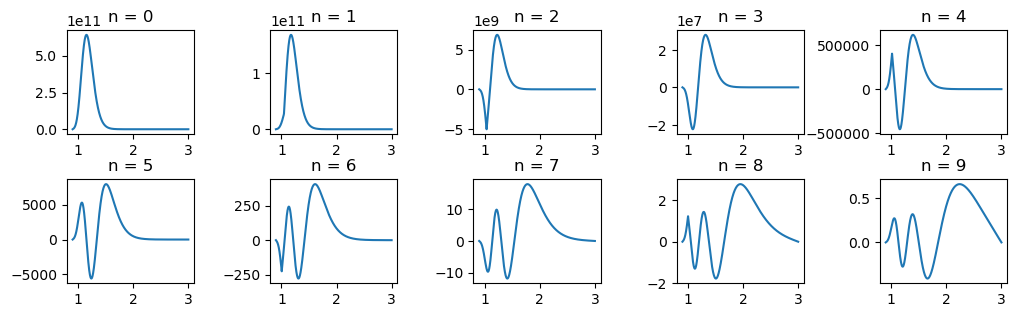

In [28]:
Sg = np.zeros(2*len(psi_c))
y = np.zeros(2*len(psi_c))
N = len(eps_Sch_21_7)
fig, ax = plt.subplots(int(N/5), int(N/2), figsize = (10, 3))

for i in range(N):
    psi_d, y_d = Sd(eps_Sch_21_7[i], gamma)
    psi_c, y_c = Sc(eps_Sch_21_7[i], gamma)
    psi_c = psi_c*psi_d[len(psi_d)-1]/psi_c[len(psi_c)-1]
    
    for j in range(len(psi_c)):
        Sg[j] = psi_c[j]
        y[j] = y_c[j]
    for j in range(len(psi_d)):
        Sg[len(psi_d)+j] = psi_d[len(psi_d) - 1 - j]
        y[len(psi_d)+j] = y_d[len(psi_d) - 1 - j]
       
    
    if i < N/2:
        ax[0, i].plot(y, Sg)
        ax[0, i].set_title("n = %.f"%i)
        fig.tight_layout(pad=0.1)
    else:
        ax[1, i-5].plot(y, Sg)
        ax[1, i-5].set_title("n = %.f"%i)
        fig.tight_layout(pad=0.1)

A partir das plotagens dos gráficos, vemos que foram encontrado alguns outliers. Para percebermos, basta ver a suavidade das curvas dos gráficos, além de que algumas energias encontradas representam os mesmo estado ligado que outras. Então, devemos retira-los manualmente, já que não há tantos dados para serem observados. Para retirar os outliers, utilizaremos a função `delete` do numpy.

In [29]:
eps_Sch_21_7 = np.delete(eps_Sch_21_7, [1, 2, 4, 6, 8])
eps_Sch_21_7

array([-0.77107746, -0.42149329, -0.19468686, -0.06712945, -0.01044704])

Agora faremos a plotagem novamente, e manualmente podemos ver quais níveis encontramos, apenas contando a quantidade de vezes que a função chegou a zero.

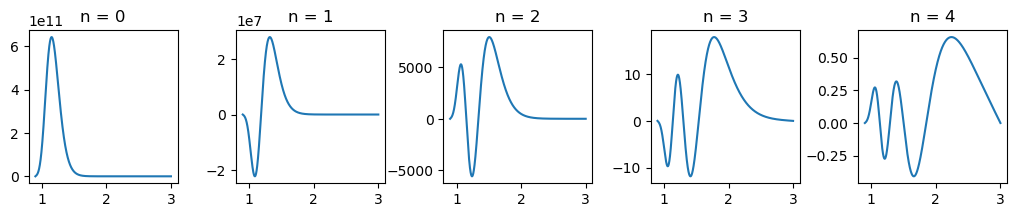

In [30]:
Sg = np.zeros(2*len(psi_c)) #criando um array para salvar a solução geral
y = np.zeros(2*len(psi_c)) #criando um array para salvar as posições
N = len(eps_Sch_21_7) #quantidade de níveis de energias calculado
fig, ax = plt.subplots(1, N, figsize = (10, 2)) #criando uma figura para por os subplots
for i in range(N):
    psi_d, y_d = Sd(eps_Sch_21_7[i], gamma)
    psi_c, y_c = Sc(eps_Sch_21_7[i], gamma)
    psi_c = psi_c*psi_d[len(psi_d)-1]/psi_c[len(psi_c)-1]
    
    #armazenando a solução crescente no array
    for j in range(len(psi_c)):
        Sg[j] = psi_c[j]
        y[j] = y_c[j]
        
    #armazenando a solução decrescente no array
    for j in range(len(psi_d)):
        Sg[len(psi_d)+j] = psi_d[len(psi_d) - 1 - j]
        y[len(psi_d)+j] = y_d[len(psi_d) - 1 - j]
       
    
    ax[i].plot(y, Sg) #plotando a solução geral
    ax[i].set_title("n = %.f"%i)
    fig.tight_layout(pad=0.1)

Lembrando que esses gráficos é $\psi_n(y)$ em função $y$.

Agora faremos as mesmas coisas para moléculas de átomos fictícios 1, 2, 3 e o para uma molécula de oxigênio, $\gamma = 50, 100, 200$ e $150$, respectivamente.

**Encontrando as autofunções da EDO para o átomo fictício 1.**

In [31]:
eps_n = -0.99
gamma = 50
lista = []
i = 0
temp = 0.01
while eps_n < -0.01:
    dpsi_c = 1
    dpsi_d = 0
    while abs(dpsi_d - dpsi_c) > 1e-6*abs(dpsi_c+dpsi_d)/2 :
        psi_d, y_d = Sd(eps_n, gamma)
        psi_c, y_c = Sc(eps_n, gamma)
        psi_c = psi_c*psi_d[len(psi_d)-1]/psi_c[len(psi_c)-1]
        dpsi_d = df(psi_d, y_d)
        dpsi_c = df(psi_c, y_c)
        
        eps_old = eps_n
        eps_n += temp*abs(dpsi_d - dpsi_c)/abs(dpsi_d + dpsi_c)/2
        
        if eps_n == eps_old:
            eps_n += 0.05
            
    if i == 0 and eps_n<0:
        lista.append(eps_n)
        i+=1
    else:
        if abs(lista[i-1]-eps_n)>1e-2 and eps_n < 0:
            lista.append(eps_n)
            i+=1
eps_Sch_50=np.array(lista)
print(eps_Sch_50)

[-0.89640316 -0.81077853 -0.76077849 -0.71065737 -0.66065736 -0.63537036
 -0.58537033 -0.55142915 -0.50142914 -0.48694188 -0.43694185 -0.41704113
 -0.36301605 -0.3057289  -0.26154287 -0.2156338  -0.16563379 -0.14479577
 -0.11786233 -0.09114659 -0.07144054 -0.05250428 -0.03899265 -0.0181302 ]


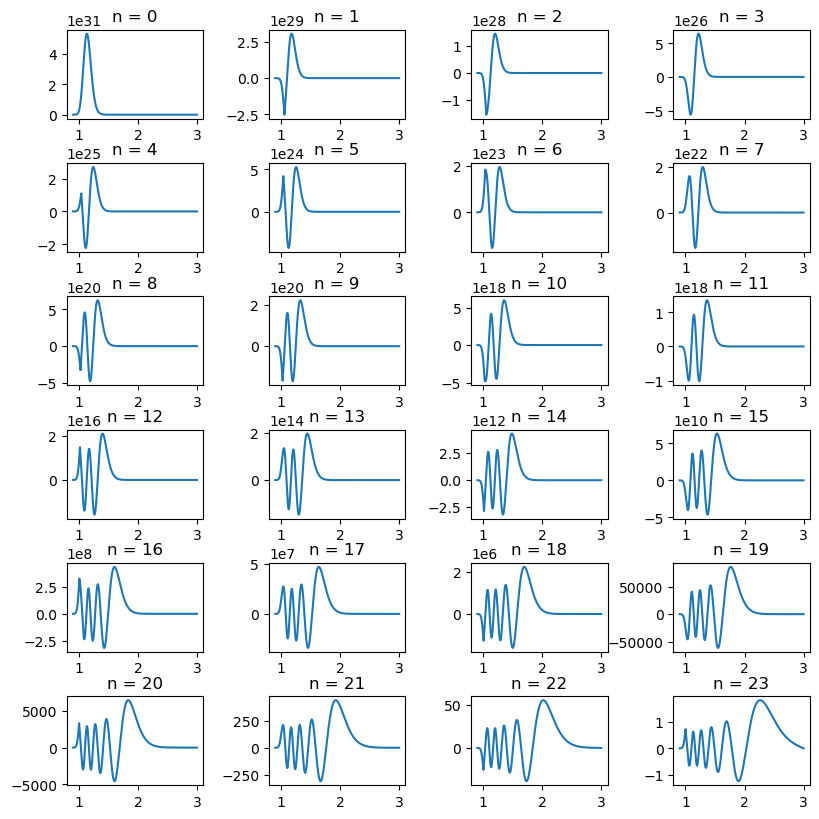

In [32]:
Sg = np.zeros(2*len(psi_c))
y = np.zeros(2*len(psi_c))
N = len(eps_Sch_50)
fig, ax = plt.subplots(6, 4, figsize = (8, 8))
cont1 = 0
cont2 = 1
for i in range(N):
    psi_d, y_d = Sd(eps_Sch_50[i], gamma)
    psi_c, y_c = Sc(eps_Sch_50[i], gamma)
    psi_c = psi_c*psi_d[len(psi_d)-1]/psi_c[len(psi_c)-1]
    
    for j in range(len(psi_c)):
        Sg[j] = psi_c[j]
        y[j] = y_c[j]
    for j in range(len(psi_d)):
        Sg[len(psi_d)+j] = psi_d[len(psi_d) - 1 - j]
        y[len(psi_d)+j] = y_d[len(psi_d) - 1 - j]
       
    if i%4==0 and i>0:
        cont1 += 1
        cont2 += 1 

    if i < cont2*4 and cont1 < 6:
        ax[cont1, i - cont1*4].plot(y, Sg)
        ax[cont1, i - cont1*4].set_title("n = %.f"%i)
        fig.tight_layout(pad=0.01)

Neste caso, manterei os valores `lista_50[22]` e `lista_50[23]`, pois mesmo que seus gráficos não tenham uma curva tão suave, não foram encontrados outros valores para aqueles estados ligados.

In [33]:
eps_Sch_50= np.delete(eps_Sch_50, [1, 2, 4, 5, 6, 8, 9, 12, 14, 16, 18, 20])
eps_Sch_50

array([-0.89640316, -0.71065737, -0.55142915, -0.43694185, -0.41704113,
       -0.3057289 , -0.2156338 , -0.14479577, -0.09114659, -0.05250428,
       -0.03899265, -0.0181302 ])

Podemos perceber que há dois valores de energias encontrados bem próximos, que os gráficos de ambos são bem parecidos, suaves e representam o mesmo estado ligado. Então, para resolver tal problema, vamos substituir um deles pela média entre eles e retirar o outro do array.

In [34]:
media = (eps_Sch_50[3] + eps_Sch_50[4])/2
eps_Sch_50[3] = media
eps_Sch_50 = np.delete(eps_Sch_50, 4)

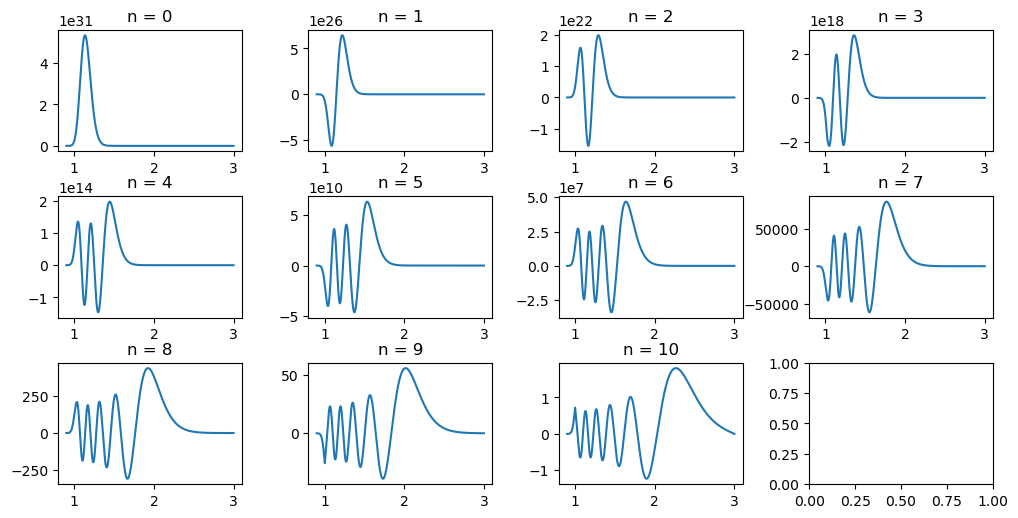

In [35]:
Sg = np.zeros(2*len(psi_c))
y = np.zeros(2*len(psi_c))
N = len(eps_Sch_50)
fig, ax = plt.subplots(3, 4, figsize = (10, 5))
cont1 = 0
cont2 = 1
for i in range(N):
    psi_d, y_d = Sd(eps_Sch_50[i], gamma)
    psi_c, y_c = Sc(eps_Sch_50[i], gamma)
    psi_c = psi_c*psi_d[len(psi_d)-1]/psi_c[len(psi_c)-1]
    
    for j in range(len(psi_c)):
        Sg[j] = psi_c[j]
        y[j] = y_c[j]
    for j in range(len(psi_d)):
        Sg[len(psi_d)+j] = psi_d[len(psi_d) - 1 - j]
        y[len(psi_d)+j] = y_d[len(psi_d) - 1 - j]
       
    if i%4==0 and i>0:
        cont1 += 1
        cont2 += 1 

    if i < cont2*4 and cont1 < 3:
        ax[cont1, i - cont1*4].plot(y, Sg)
        ax[cont1, i - cont1*4].set_title("n = %.f"%i)
        fig.tight_layout(pad=0.05)
        

**Faremos agora para o átomo fictício 2**. Antes de tudo, devemos lembrar que quanto maior o $\gamma$, mais estados ligados serão encontrados. Assim para diminuir o risco de pular algum estado ligado, iremos diminuir o tamanho do passo que algoritmo dá quando ele percebe que fica preso em uma energia de $0.05$ para $0.02$.

In [36]:
eps_n = -0.99
gamma = 100
lista = []
i = 0
temp = 0.01
while eps_n < -0.01:
    dpsi_c = 1
    dpsi_d = 0
    while abs(dpsi_d - dpsi_c) > 1e-6*abs(dpsi_c+dpsi_d)/2 :
        psi_d, y_d = Sd(eps_n, gamma)
        psi_c, y_c = Sc(eps_n, gamma)
        psi_c = psi_c*psi_d[len(psi_d)-1]/psi_c[len(psi_c)-1]
        dpsi_d = df(psi_d, y_d)
        dpsi_c = df(psi_c, y_c)
        
        eps_old = eps_n
        eps_n += temp*abs(dpsi_d - dpsi_c)/abs(dpsi_d + dpsi_c)/2
        
        if eps_n == eps_old:
            eps_n += 0.02
            
    if i == 0 and eps_n<0:
        lista.append(eps_n)
        i+=1
    else:
        if abs(lista[i-1]-eps_n)>1e-2 and eps_n < 0:
            lista.append(eps_n)
            i+=1
eps_Sch_100=np.array(lista)
print(eps_Sch_100)

[-0.94737658 -0.90151338 -0.88151336 -0.8475897  -0.8039617  -0.78396168
 -0.75473455 -0.71381068 -0.66861155 -0.63051297 -0.61051296 -0.58901623
 -0.55375362 -0.5337536  -0.51573899 -0.49573899 -0.48327474 -0.44856493
 -0.41883563 -0.38727357 -0.36019988 -0.33163867 -0.30713022 -0.28713021
 -0.25938609 -0.23938608 -0.21672225 -0.19631902 -0.17888795 -0.16092419
 -0.1456264  -0.12996017 -0.11667432 -0.09176167 -0.0706114  -0.0529393
 -0.02685664]


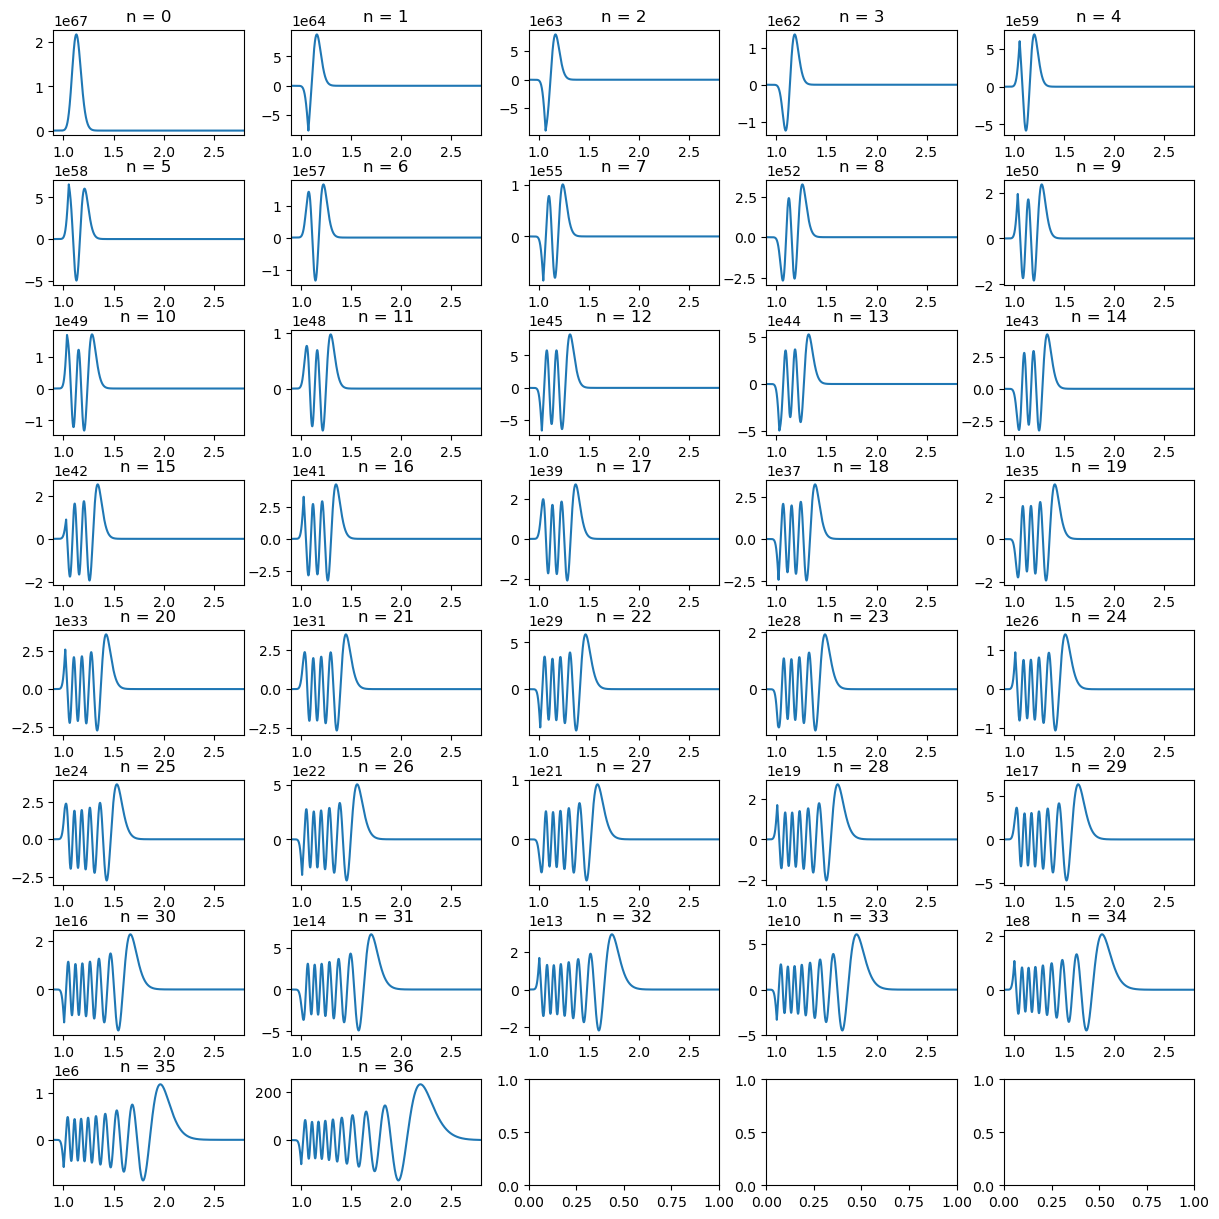

In [37]:
Sg = np.zeros(2*len(psi_c))
y = np.zeros(2*len(psi_c))
N = len(eps_Sch_100)
fig, ax = plt.subplots(8, 5, figsize = (12, 12))
cont1 = 0
cont2 = 1
for i in range(N):
    psi_d, y_d = Sd(eps_Sch_100[i], gamma)
    psi_c, y_c = Sc(eps_Sch_100[i], gamma)
    psi_c = psi_c*psi_d[len(psi_d)-1]/psi_c[len(psi_c)-1]
    
    for j in range(len(psi_c)):
        Sg[j] = psi_c[j]
        y[j] = y_c[j]
    for j in range(len(psi_d)):
        Sg[len(psi_d)+j] = psi_d[len(psi_d) - 1 - j]
        y[len(psi_d)+j] = y_d[len(psi_d) - 1 - j]
       
    if i%5==0 and i>0:
        cont1 += 1
        cont2 += 1 

    if i < cont2*5 and cont1 < 8:
        ax[cont1, i - cont1*5].plot(y, Sg)
        ax[cont1, i - cont1*5].set_title("n = %.f"%i)
        ax[cont1, i - cont1*5].set_xlim(0.9, 2.8)
        fig.tight_layout(pad=0.01)

In [38]:
eps_Sch_100 = np.delete(eps_Sch_100, [1, 2, 4, 5, 7, 9, 10, 12, 13, 15, 16, 18, 20, 22, 24, 26, 28, 30, 36])
eps_Sch_100

array([-0.94737658, -0.8475897 , -0.75473455, -0.66861155, -0.58901623,
       -0.51573899, -0.44856493, -0.38727357, -0.33163867, -0.28713021,
       -0.23938608, -0.19631902, -0.16092419, -0.12996017, -0.11667432,
       -0.09176167, -0.0706114 , -0.0529393 ])

Retiramos o elemento `eps_Sch_100[36]`, pois mesmo diminuindo o tamanho do passo o programa acabou pulando uma energia de ligação.

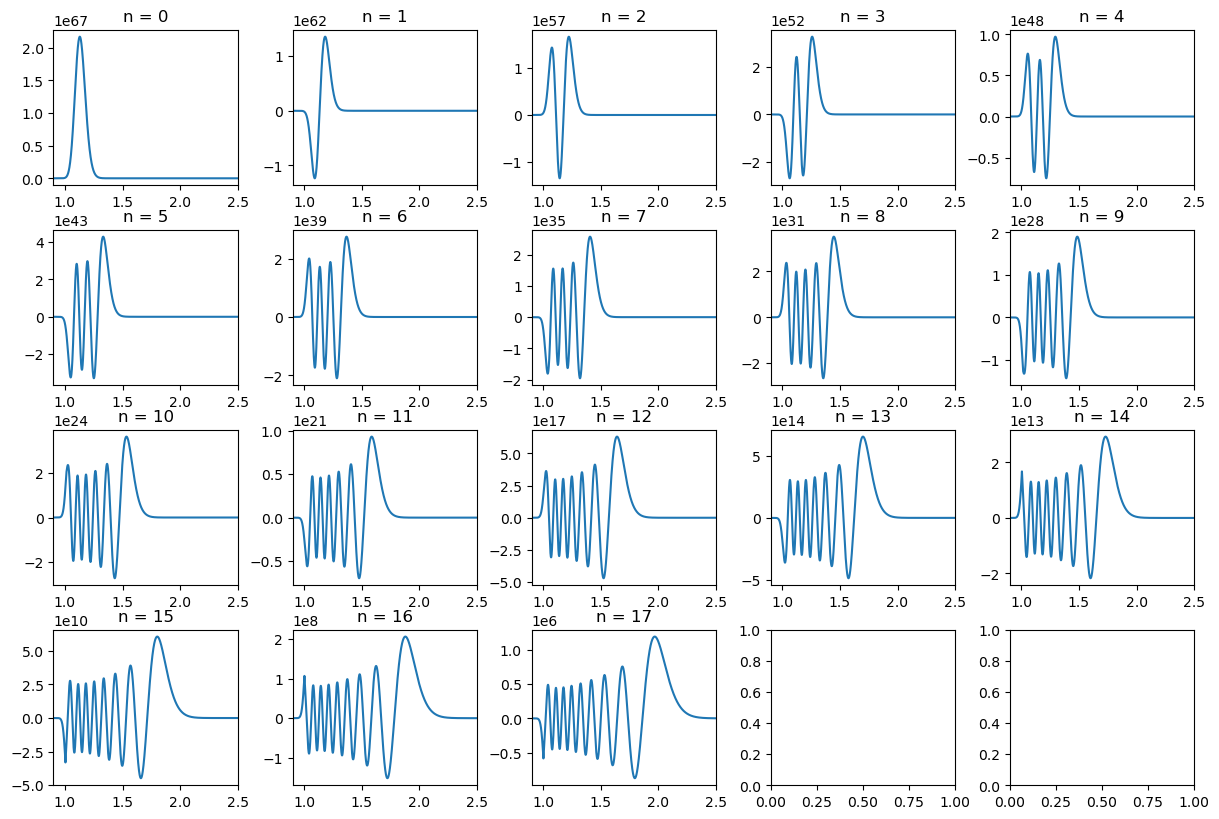

In [39]:
Sg = np.zeros(2*len(psi_c))
y = np.zeros(2*len(psi_c))
N = len(eps_Sch_100)
fig, ax = plt.subplots(4, 5, figsize = (12, 8))
cont1 = 0
cont2 = 1
for i in range(N):
    psi_d, y_d = Sd(eps_Sch_100[i], gamma)
    psi_c, y_c = Sc(eps_Sch_100[i], gamma)
    psi_c = psi_c*psi_d[len(psi_d)-1]/psi_c[len(psi_c)-1]
    
    for j in range(len(psi_c)):
        Sg[j] = psi_c[j]
        y[j] = y_c[j]
    for j in range(len(psi_d)):
        Sg[len(psi_d)+j] = psi_d[len(psi_d) - 1 - j]
        y[len(psi_d)+j] = y_d[len(psi_d) - 1 - j]
       
    if i%5==0 and i>0:
        cont1 += 1
        cont2 += 1 

    if i < cont2*5 and cont1 < 4:
        ax[cont1, i - cont1*5].plot(y, Sg)
        ax[cont1, i - cont1*5].set_title("n = %.f"%i)
        ax[cont1, i - cont1*5].set_xlim(0.9, 2.5)
        fig.tight_layout(pad=0.01)

**Agora faremos tudo de novo para uma molécula de oxigênio**. Como o valor do $\gamma$ é consideravelmente alto, então iremos diminuir novamente o tamanho do passo que algoritmo dá quando ele percebe que fica preso em uma energia de $0.02$ para $0.01$.

In [40]:
eps_n = -0.99
gamma = 150
lista = []
i = 0
temp = 0.01
while eps_n < -0.01:
    dpsi_c = 1
    dpsi_d = 0
    while abs(dpsi_d - dpsi_c) > 1e-6*abs(dpsi_c+dpsi_d)/2 :
        psi_d, y_d = Sd(eps_n, gamma)
        psi_c, y_c = Sc(eps_n, gamma)
        psi_c = psi_c*psi_d[len(psi_d)-1]/psi_c[len(psi_c)-1]
        dpsi_d = df(psi_d, y_d)
        dpsi_c = df(psi_c, y_c)
        
        eps_old = eps_n
        eps_n += temp*abs(dpsi_d - dpsi_c)/abs(dpsi_d + dpsi_c)/2
        
        if eps_n == eps_old:
            eps_n += 0.01
            
    if i == 0 and eps_n<0:
        lista.append(eps_n)
        i+=1
    else:
        if abs(lista[i-1]-eps_n)>1e-2 and eps_n < 0:
            lista.append(eps_n)
            i+=1
eps_Sch_150 = np.array(lista)
print(eps_Sch_150)

[-0.96473354 -0.93339427 -0.92339426 -0.89664164 -0.86610121 -0.85610119
 -0.83167418 -0.80226572 -0.79226571 -0.76977293 -0.74160693 -0.73160692
 -0.71087878 -0.70087878 -0.68399628 -0.65493163 -0.62934423 -0.61934422
 -0.6018704  -0.57757464 -0.551633   -0.52861668 -0.51861667 -0.50415628
 -0.48240162 -0.45937603 -0.43886141 -0.4288614  -0.41722693 -0.39792789
 -0.37764254 -0.35953244 -0.34055523 -0.32360568 -0.3058962  -0.29007731
 -0.27359543 -0.25887598 -0.24358161 -0.22992927 -0.21578221 -0.20316353
 -0.17850388 -0.15587419 -0.13519695 -0.11639334 -0.09938313 -0.0840847
 -0.05828947]


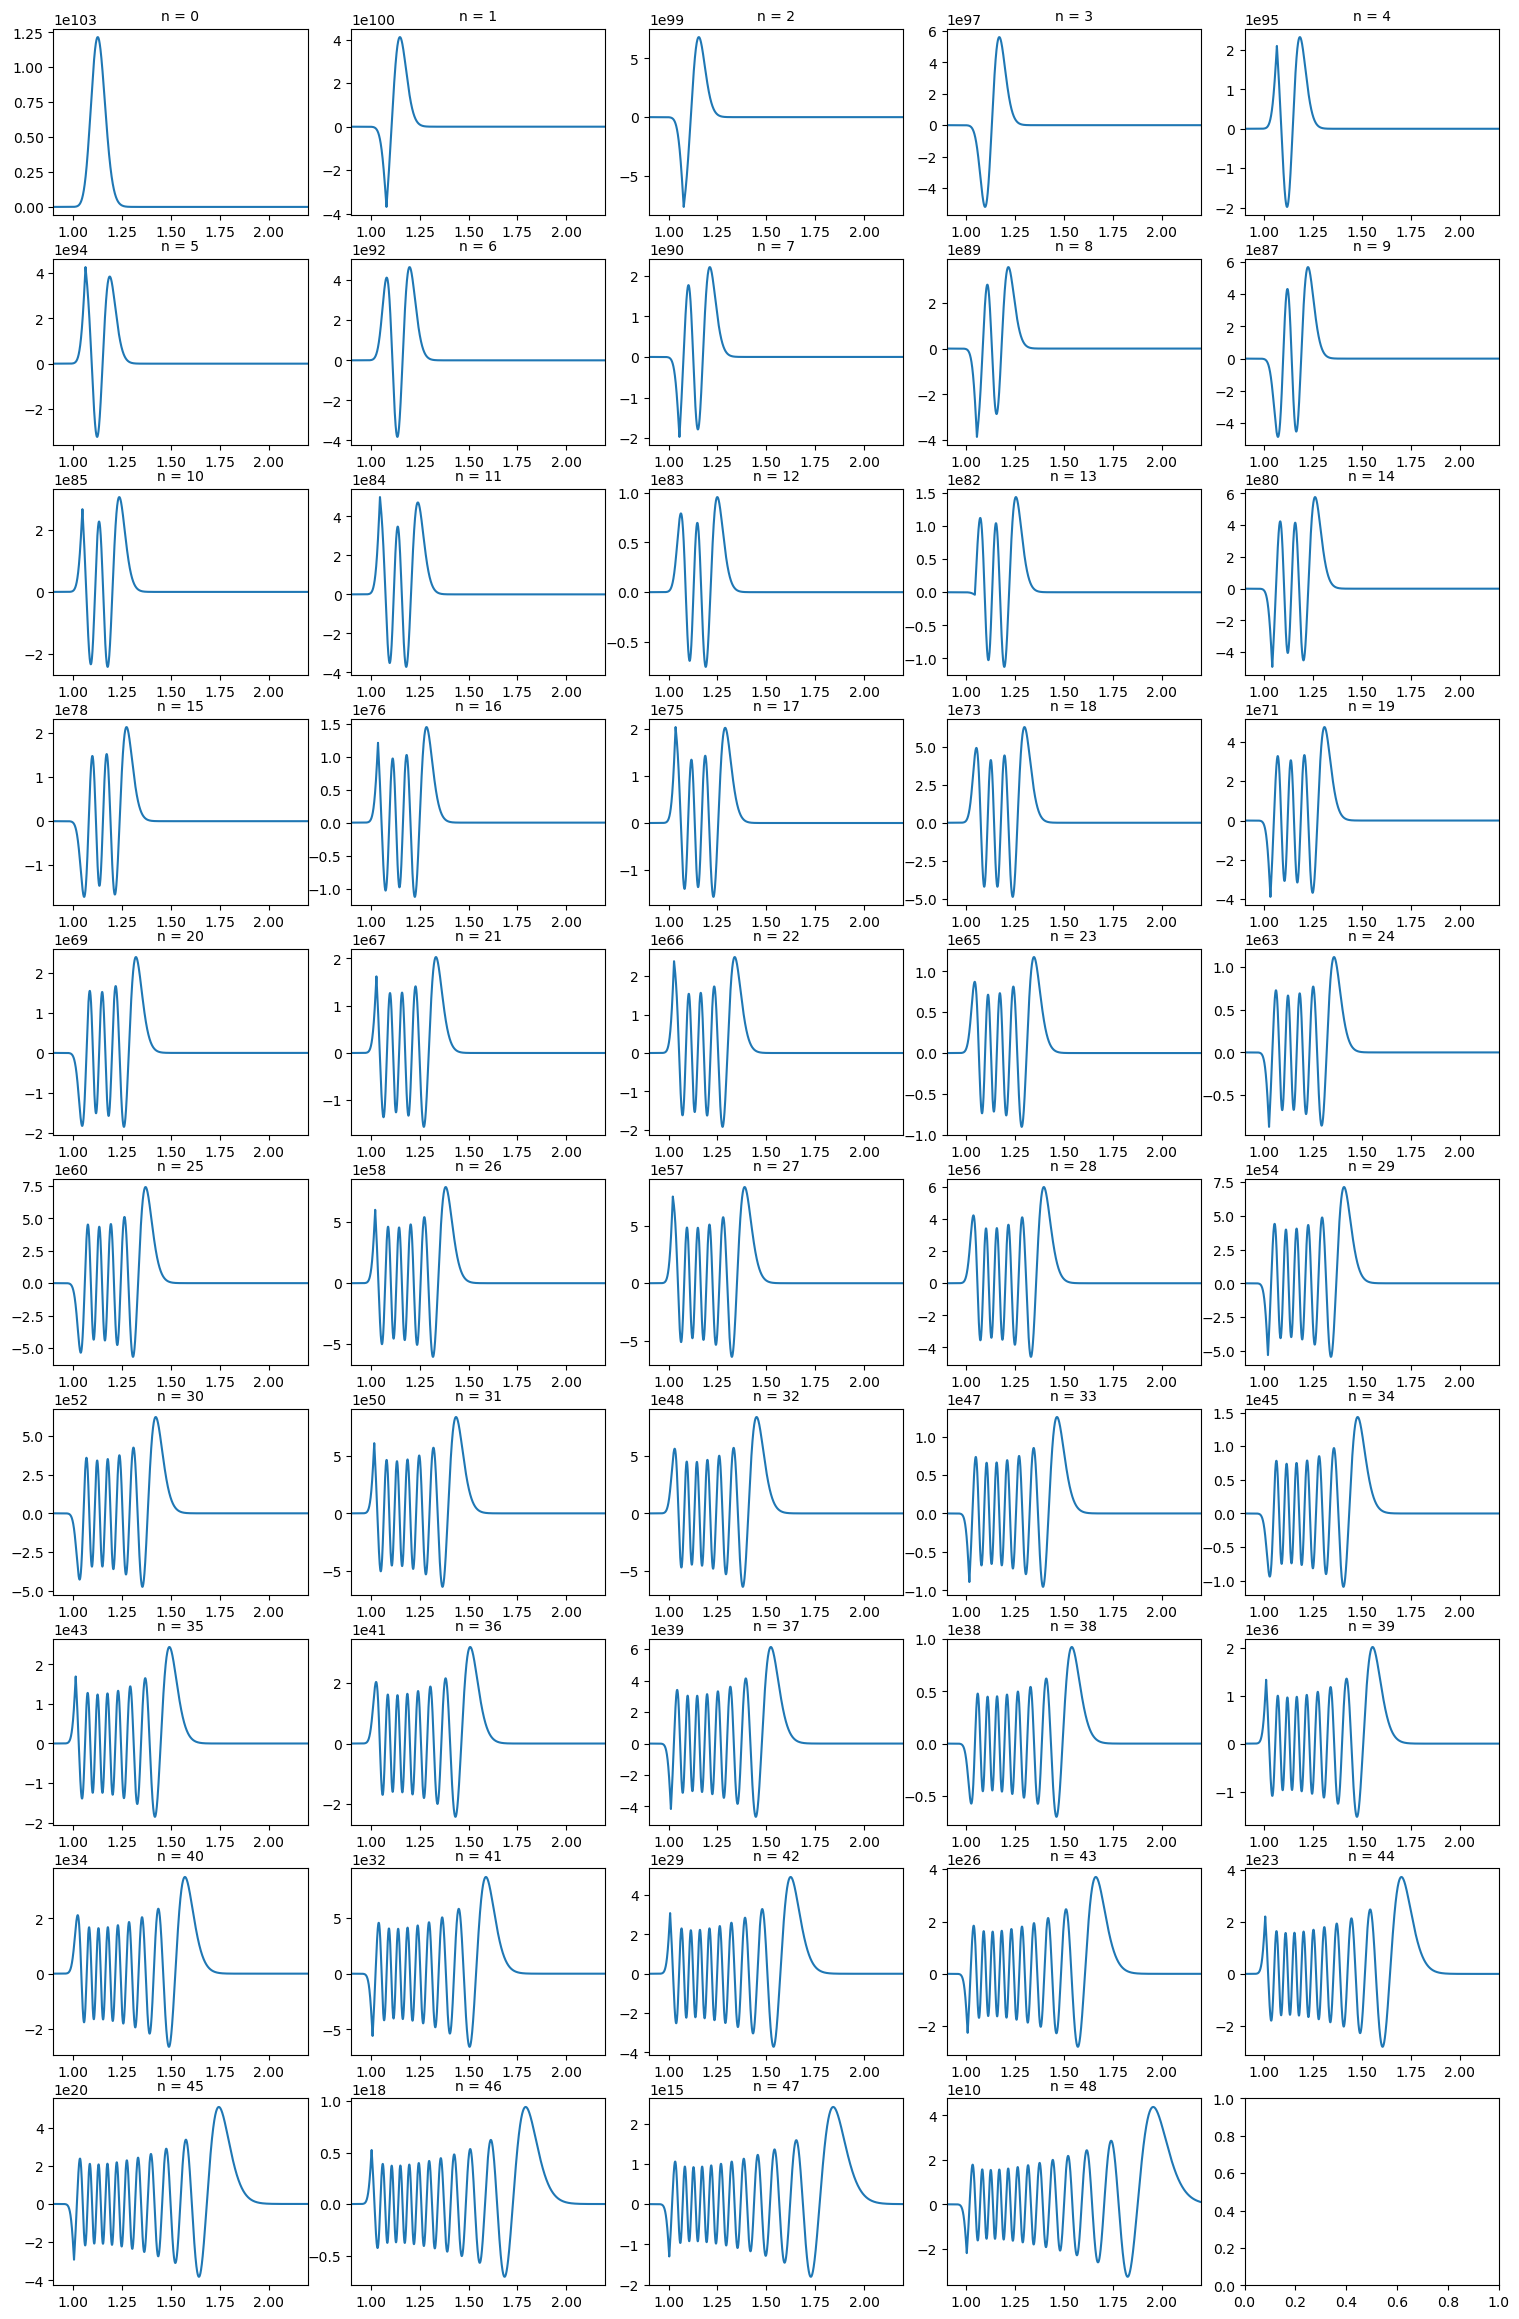

In [41]:
Sg = np.zeros(2*len(psi_c))
y = np.zeros(2*len(psi_c))
N = len(eps_Sch_150)
fig, ax = plt.subplots(10, 5, figsize = (15, 23))
cont1 = 0
cont2 = 1
for i in range(N):
    psi_d, y_d = Sd(eps_Sch_150[i], gamma)
    psi_c, y_c = Sc(eps_Sch_150[i], gamma)
    psi_c = psi_c*psi_d[len(psi_d)-1]/psi_c[len(psi_c)-1]
    
    for j in range(len(psi_c)):
        Sg[j] = psi_c[j]
        y[j] = y_c[j]
    for j in range(len(psi_d)):
        Sg[len(psi_d)+j] = psi_d[len(psi_d) - 1 - j]
        y[len(psi_d)+j] = y_d[len(psi_d) - 1 - j]
       
    if i%5==0 and i>0:
        cont1 += 1
        cont2 += 1 

    if i < cont2*5 and cont1 < 10:
        ax[cont1, i - cont1*5].plot(y, Sg)
        ax[cont1, i - cont1*5].set_title("n = %.f"%i, fontsize = 10)
        ax[cont1, i - cont1*5].set_xlim(0.9, 2.2)
        fig.tight_layout(pad=0.01)

In [42]:
eps_Sch_150 = np.delete(eps_Sch_150, [1, 2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19, 21, 22, 24, 26, 27, 29, 31, 33, 35, 37, 39, 48])
eps_Sch_150

array([-0.96473354, -0.89664164, -0.83167418, -0.76977293, -0.71087878,
       -0.65493163, -0.6018704 , -0.551633  , -0.50415628, -0.45937603,
       -0.41722693, -0.37764254, -0.34055523, -0.3058962 , -0.27359543,
       -0.24358161, -0.21578221, -0.20316353, -0.17850388, -0.15587419,
       -0.13519695, -0.11639334, -0.09938313, -0.0840847 ])

Retiramos o elemento `eps_Sch_150[48]` pelo mesmo motivo que tiramos o elemento `eps_Sch_100[36]`.

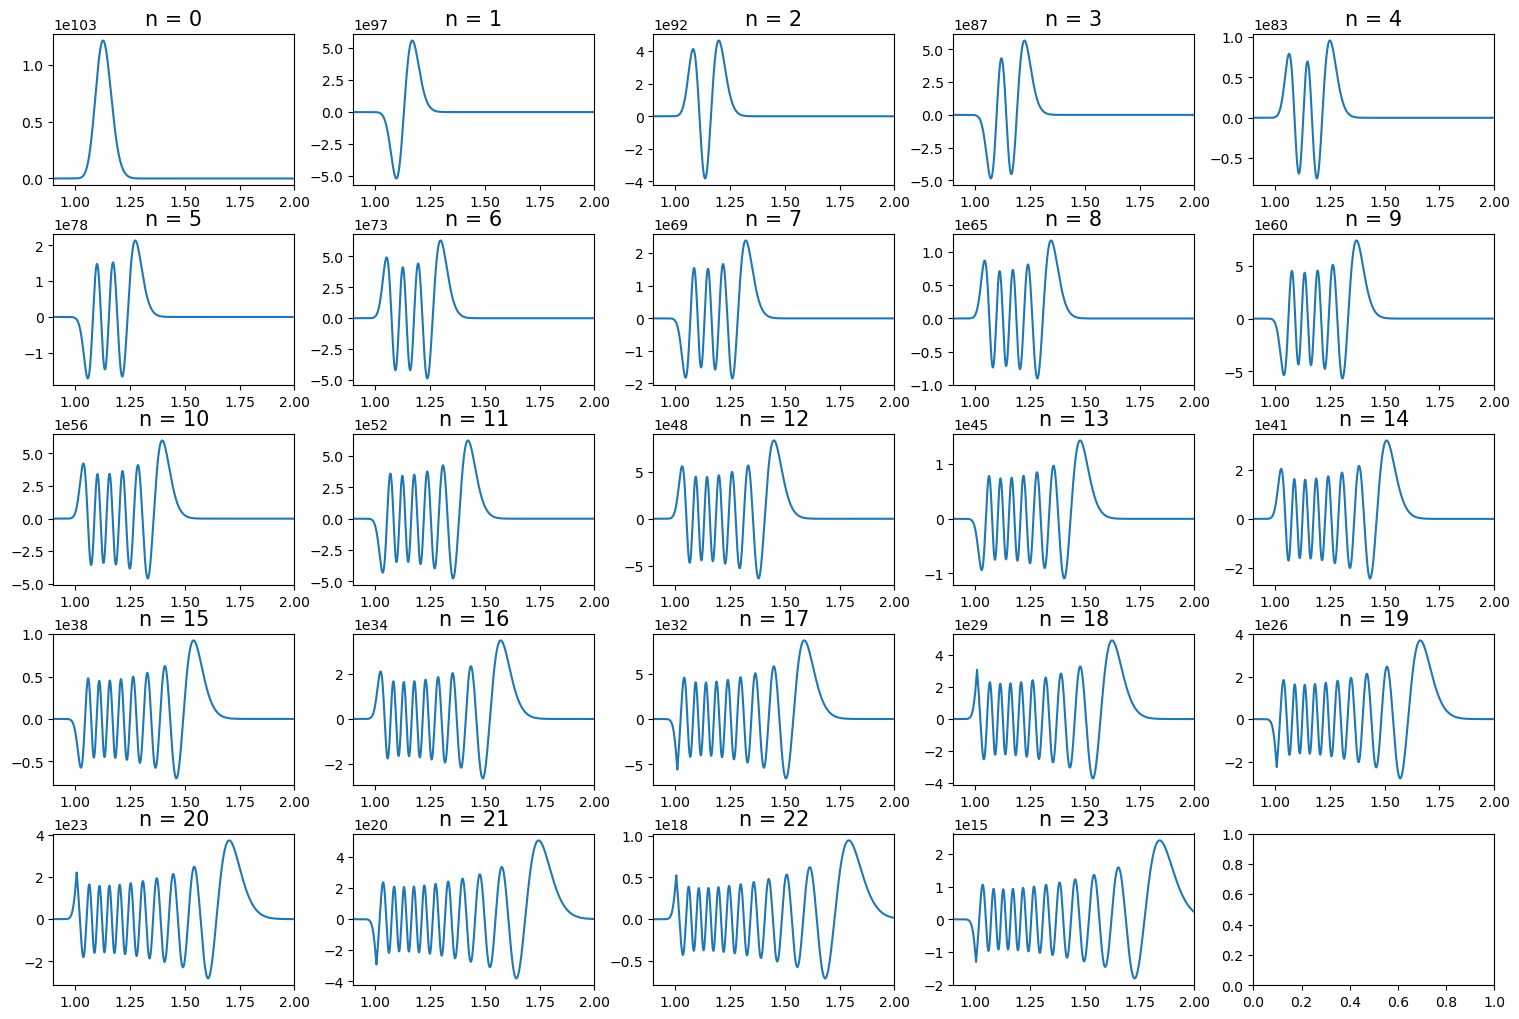

In [43]:
Sg = np.zeros(2*len(psi_c))
y = np.zeros(2*len(psi_c))
N = len(eps_Sch_150)
fig, ax = plt.subplots(5, 5, figsize = (15, 10))
cont1 = 0
cont2 = 1
for i in range(N):
    psi_d, y_d = Sd(eps_Sch_150[i], gamma)
    psi_c, y_c = Sc(eps_Sch_150[i], gamma)
    psi_c = psi_c*psi_d[len(psi_d)-1]/psi_c[len(psi_c)-1]
    
    for j in range(len(psi_c)):
        Sg[j] = psi_c[j]
        y[j] = y_c[j]
    for j in range(len(psi_d)):
        Sg[len(psi_d)+j] = psi_d[len(psi_d) - 1 - j]
        y[len(psi_d)+j] = y_d[len(psi_d) - 1 - j]
       
    if i%5==0 and i>0:
        cont1 += 1
        cont2 += 1 

    if i < cont2*5 and cont1 < 5:
        ax[cont1, i - cont1*5].plot(y, Sg)
        ax[cont1, i - cont1*5].set_title("n = %.f"%i, fontsize = 15)
        ax[cont1, i - cont1*5].set_xlim(0.9, 2)
        fig.tight_layout(pad=0.01)

**Encontrando as energias de ligação para o átomo fictício 3.**

In [44]:
eps_n = -0.99
gamma = 200
lista = []
i = 0
temp = 0.01
while eps_n < -0.01:
    dpsi_c = 1
    dpsi_d = 0
    while abs(dpsi_d - dpsi_c) > 1e-6*abs(dpsi_c+dpsi_d)/2 :
        psi_d, y_d = Sd(eps_n, gamma)
        psi_c, y_c = Sc(eps_n, gamma)
        psi_c = psi_c*psi_d[len(psi_d)-1]/psi_c[len(psi_c)-1]
        dpsi_d = df(psi_d, y_d)
        dpsi_c = df(psi_c, y_c)
        
        eps_old = eps_n
        eps_n += temp*abs(dpsi_d - dpsi_c)/abs(dpsi_d + dpsi_c)/2
        
        if eps_n == eps_old:
            eps_n += 0.01
            
    if i == 0 and eps_n<0:
        lista.append(eps_n)
        i+=1
    else:
        if abs(lista[i-1]-eps_n)>1e-3 and eps_n < 0:
            lista.append(eps_n)
            i+=1
eps_Sch_200 = np.array(lista)
print(eps_Sch_200)

[-0.97348096 -0.9496672  -0.93966719 -0.92182001 -0.89834096 -0.87192872
 -0.8490374  -0.82378272 -0.80156854 -0.77735737 -0.75585908 -0.7326277
 -0.71186281 -0.68956849 -0.66954373 -0.65954373 -0.64815416 -0.62887019
 -0.60835884 -0.58981251 -0.57015635 -0.55234193 -0.54234193 -0.53352015
 -0.51643016 -0.50643015 -0.49842338 -0.48204899 -0.46483884 -0.44917021
 -0.43273897 -0.41776545 -0.40209587 -0.39209587 -0.38780612 -0.37288124
 -0.35926337 -0.34926337 -0.33210808 -0.32210807 -0.30631076 -0.28184162
 -0.25867049 -0.2367668  -0.21609965 -0.19663769 -0.17834918 -0.16120196
 -0.15120196 -0.14516346 -0.13020066 -0.11628011]


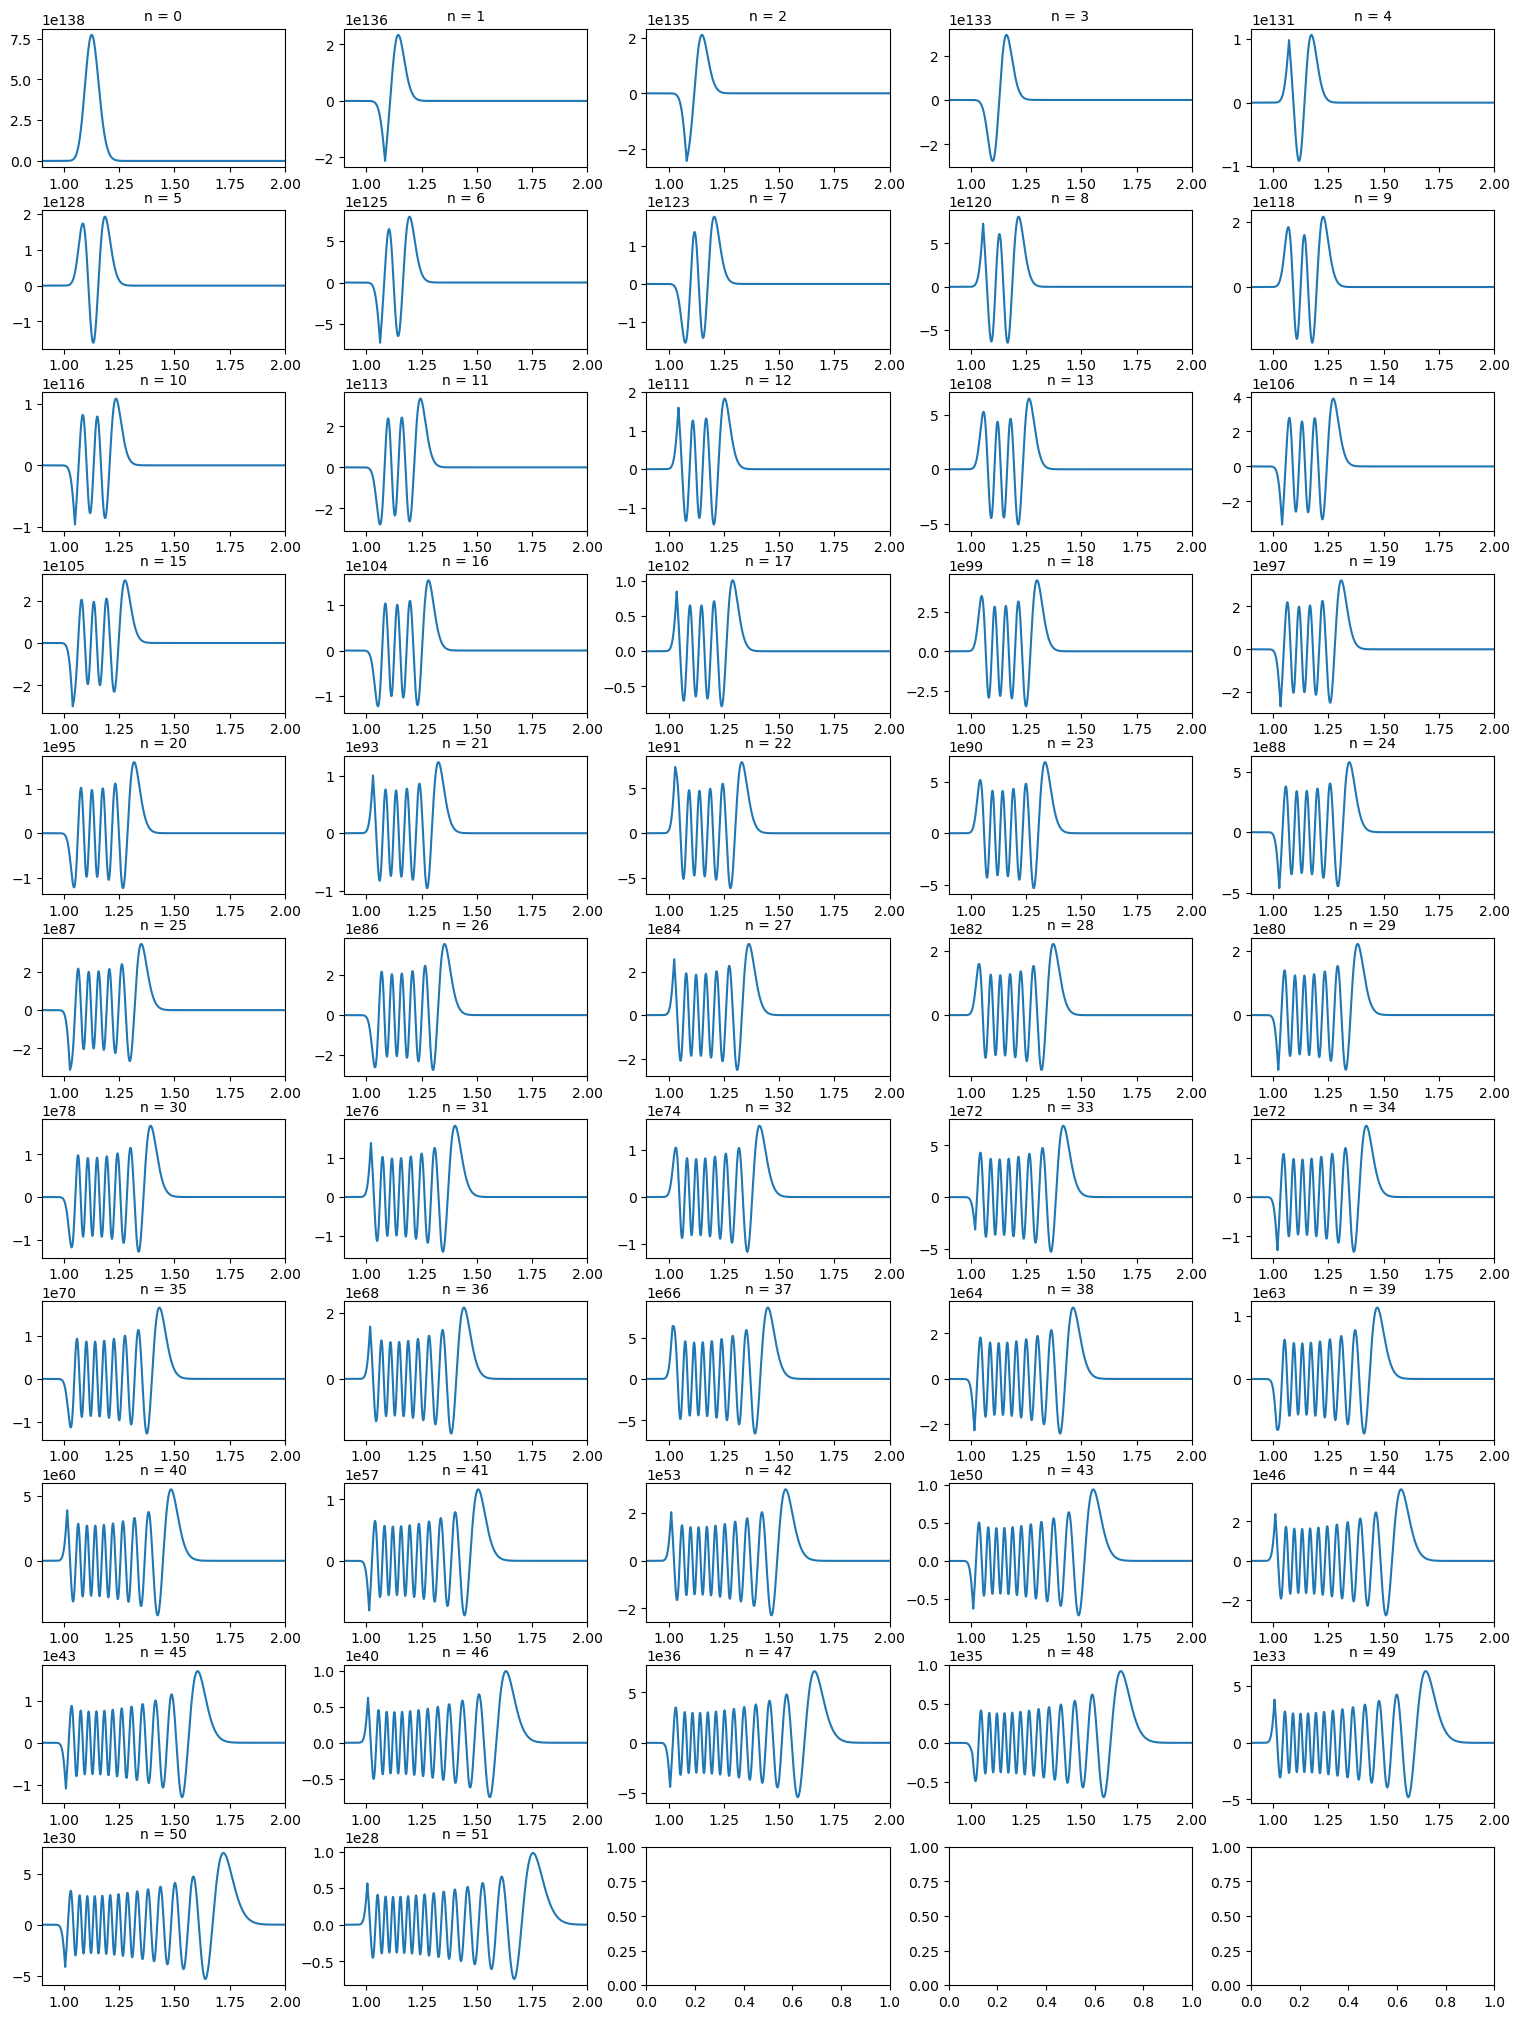

In [45]:
Sg = np.zeros(2*len(psi_c))
y = np.zeros(2*len(psi_c))
N = len(eps_Sch_200)
fig, ax = plt.subplots(11, 5, figsize = (15, 20))
cont1 = 0
cont2 = 1
for i in range(N):
    psi_d, y_d = Sd(eps_Sch_200[i], gamma)
    psi_c, y_c = Sc(eps_Sch_200[i], gamma)
    psi_c = psi_c*psi_d[len(psi_d)-1]/psi_c[len(psi_c)-1]
    
    for j in range(len(psi_c)):
        Sg[j] = psi_c[j]
        y[j] = y_c[j]
    for j in range(len(psi_d)):
        Sg[len(psi_d)+j] = psi_d[len(psi_d) - 1 - j]
        y[len(psi_d)+j] = y_d[len(psi_d) - 1 - j]
       
    if i%5==0 and i>0:
        cont1 += 1
        cont2 += 1 

    if i < cont2*5 and cont1 < 11:
        ax[cont1, i - cont1*5].plot(y, Sg)
        ax[cont1, i - cont1*5].set_title("n = %.f"%i, fontsize = 10)
        ax[cont1, i - cont1*5].set_xlim(0.9, 2)
        fig.tight_layout(pad=0.01)

In [46]:
eps_Sch_200 = np.delete(eps_Sch_200, [1, 2, 4, 6, 8, 10, 12, 14, 15, 17, 19, 21, 22, 24, 25, 27, 29, 31, 33, 34, 36, 38, 47])
eps_Sch_200

array([-0.97348096, -0.92182001, -0.87192872, -0.82378272, -0.77735737,
       -0.7326277 , -0.68956849, -0.64815416, -0.60835884, -0.57015635,
       -0.53352015, -0.49842338, -0.46483884, -0.43273897, -0.40209587,
       -0.37288124, -0.34926337, -0.32210807, -0.30631076, -0.28184162,
       -0.25867049, -0.2367668 , -0.21609965, -0.19663769, -0.17834918,
       -0.15120196, -0.14516346, -0.13020066, -0.11628011])

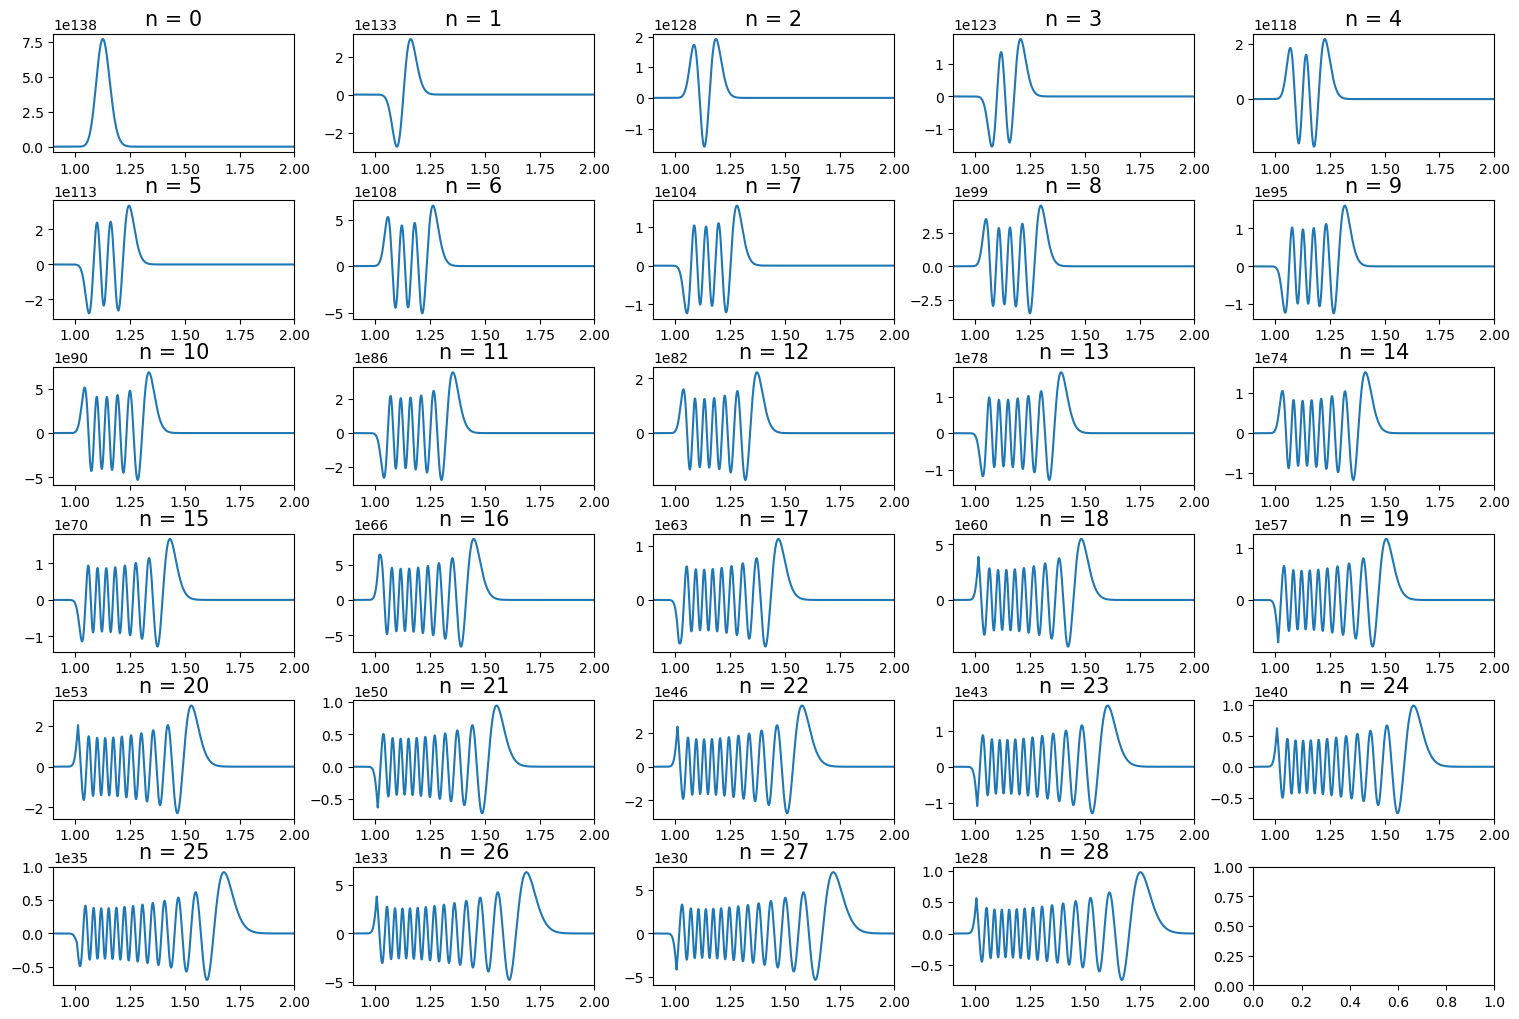

In [47]:
Sg = np.zeros(2*len(psi_c))
y = np.zeros(2*len(psi_c))
N = len(eps_Sch_200)
fig, ax = plt.subplots(6, 5, figsize = (15, 10))
cont1 = 0
cont2 = 1
for i in range(N):
    psi_d, y_d = Sd(eps_Sch_200[i], gamma)
    psi_c, y_c = Sc(eps_Sch_200[i], gamma)
    psi_c = psi_c*psi_d[len(psi_d)-1]/psi_c[len(psi_c)-1]
    
    for j in range(len(psi_c)):
        Sg[j] = psi_c[j]
        y[j] = y_c[j]
    for j in range(len(psi_d)):
        Sg[len(psi_d)+j] = psi_d[len(psi_d) - 1 - j]
        y[len(psi_d)+j] = y_d[len(psi_d) - 1 - j]
       
    if i%5==0 and i>0:
        cont1 += 1
        cont2 += 1 

    if i < cont2*5 and cont1 < 6:
        ax[cont1, i - cont1*5].plot(y, Sg)
        ax[cont1, i - cont1*5].set_title("n = %.f"%i, fontsize = 15)
        ax[cont1, i - cont1*5].set_xlim(0.9, 2)
        fig.tight_layout(pad=0.01)

Com os resultados que obtivemos pela _equação de Schrödinger_, é perceptível ver que quanto maior a energia de ligação, a probabilidade de dissociação aumenta. Vemos isso pois a medida que a energia aumenta, a função de onda tenderá a um movimento oscilatório, uma característica de ondas livres.

## 4. Comparando as duas soluções

Agora nessa seção iremos comparar os resultados obtidos entre as duas soluções, e veremos qual é a tendência.

**OBS**: o programa só utilizará até 4 casa decimais das energias.

Para $\gamma = 21.7$.

In [48]:
media_err = [] #lista que vai receber as médias dos erros
err = abs(eps_BWS_21_7 - eps_Sch_21_7) #array que vai receber a diferença entre cada elemento dos arrays
media_err.append( np.round(sum(err)/len(err), 4) ) #salvando a média dos erros
np.round(sum(err)/len(err), 4)

0.0012

Para $\gamma = 50$.

In [49]:
err = abs(eps_BWS_50 - eps_Sch_50)
media_err.append(np.round(sum(err)/len(err), 4))
np.round(sum(err)/len(err), 4)

0.0028

Para o $\gamma = 100, 150$ e $200$, devemos notar que a quantidade de valores obtidos nas nas soluções foram diferentes nos métodos em cada $\gamma$, sendo a quantidade de estados ligados encontrados pela regra de **BWS** é maior que na solução pela equação de Schrödinger. Logo, os resultados excedentes encontrados pela regra de **BWS** devem ser retirados para podermos calcular as diferenças nos métodos.

Para $\gamma = 100$.

In [50]:
err = np.zeros(len(eps_Sch_100))
for i in range(len(eps_Sch_100)):
    err[i] = abs(eps_Sch_100[i] - eps_BWS_100[i])
    
media_err.append(np.round(sum(err)/len(err), 4))
np.round(sum(err)/len(err), 4)

0.0029

Para $\gamma = 150$.

In [51]:
err = np.zeros(len(eps_Sch_150))
for i in range(len(eps_Sch_150)):
    err[i] = abs(eps_Sch_150[i] - eps_BWS_150[i])
    
media_err.append(np.round(sum(err)/len(err), 4))
np.round(sum(err)/len(err), 4)

0.0029

Para $\gamma = 200$.

In [52]:
err = np.zeros(len(eps_Sch_200))
for i in range(len(eps_Sch_200)):
    err[i] = abs(eps_Sch_200[i] - eps_BWS_200[i])
    
media_err.append(np.round(sum(err)/len(err), 4))
np.round(sum(err)/len(err), 4)

0.0037

Plotando o resultado.

Text(0.5, 1.0, 'Gráfico dos erros')

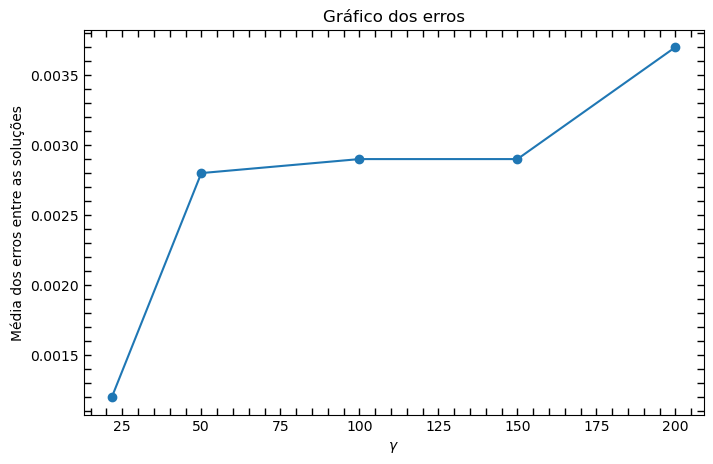

In [54]:
gamma = [21.7, 50, 100, 150, 200]
plot_ticks()
plt.plot(gamma, media_err,  'o-')
plt.ylabel('Média dos erros entre as soluções')
plt.xlabel(r"$\gamma$")
plt.title('Gráfico dos erros')

Podemos ver claramente que quanto maior o valor do $\gamma$ maior a diferença entre os resultados dos métodos. Porém, se considerarmos apenas energias menores que $-0.1$ ($\epsilon_n < -0.1$), teremos outro resultado.

Calculando o erro quando $\gamma = 21.7$.

In [55]:
media_err2 = []
err = abs(eps_Sch_21_7 - eps_BWS_21_7)
media_err2.append(np.round(sum(err)/len(err), 4))
np.round(sum(err)/len(err), 4)

0.0012

Calculando o erro quando $\gamma = 50$.

In [56]:
err = np.zeros(len(eps_Sch_50))
for i in range(5):
    err[i] = abs(eps_Sch_50[i] - eps_BWS_50[i])
media_err2.append(np.round(sum(err)/len(err), 4))
np.round(sum(err)/len(err), 4)

0.001

Calculando o erro quando $\gamma = 100$.

In [57]:
err = np.zeros(len(eps_Sch_100))
for i in range(5):
    err[i] = abs(eps_Sch_100[i] - eps_BWS_100[i])
media_err2.append(np.round(sum(err)/len(err), 4))
np.round(sum(err)/len(err), 4)

0.0

Calculando o erro quando $\gamma = 150$.

In [58]:
err = np.zeros(len(eps_Sch_150))
for i in range(5):
    err[i] = abs(eps_Sch_150[i] - eps_BWS_150[i])
media_err2.append(np.round(sum(err)/len(err), 4))
np.round(sum(err)/len(err), 4)

0.0

Calculando o erro quando $\gamma = 200$.

In [59]:
err = np.zeros(len(eps_Sch_200))
for i in range(5):
    err[i] = abs(eps_Sch_200[i] - eps_BWS_200[i])
media_err2.append(np.round(sum(err)/len(err), 4))
np.round(sum(err)/len(err), 4)

0.0

Plotando o gráfico dos erros.

Text(0.5, 1.0, 'Gráfico dos erros para $\\epsilon_n < -0.1$')

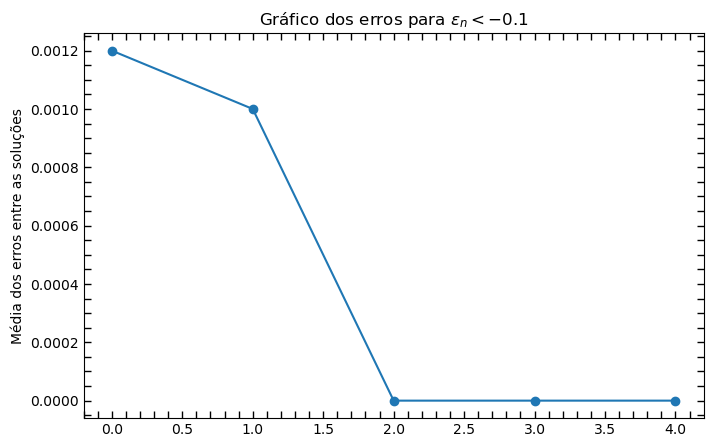

In [53]:
plot_ticks()
plt.plot(media_err2, 'o-')
plt.ylabel('Média dos erros entre as soluções')
plt.title(r'Gráfico dos erros para $\epsilon_n < -0.1$')

Já para este caso, vemos que quanto maior a quantidade de $\gamma$, menor a diferença entre os resultados das soluções. Então, podemos dizer que quanto mais próximos de zero os nível de energia são encontrados, menor será a precisão para a determinação dessas energias, e esta imprecisão aumenta a medida que o $\gamma$ cresce, devido ao fato que as energias de ligação ficam menos espaçadas. Ou seja, a medida que o $\gamma$ cresce, mais estados ligados são encontrados, dessa forma mais energias serão encontradas próximas a zero.

## 5. Conclusão

Neste `Notebook` vimos como determinar os estados ligados de uma molécula diatômica a partir do potencial do _Lennard-Jones_. Mostramos duas maneiras de obtermos as energias de ligação numericamente: pela quantização de _Bohr-Wilson-Sommerfeld_ e pela _equação de Schrödinger_. Com isso, foram mostrados os passos necessários para aplicá-los computacionalmente e, após isso, evidenciamos as diferenças entre as soluções aplicadas. 

Concluímos que as soluções convergem a um mesmo valor a medida que $\gamma$ cresce, pois quanto maior o $\gamma$, mais o comportamento do sistema é aproximadamente clássico, e isso para estados ligados não muito próximos de zero. Mas para níveis de energia muito próximos de zero, a solução se torna cada vez mais imprecisa e a imprecisão aumenta junto com o $\gamma$.

---

## Referências

**[1]** J. Chiquito, Adenilson, and Norton G. de Almeida. _O Potencial de Lennard-Jones: Aplicação À Moléculas Diatômicas._ Revista Brasileira de Ensino de Física, vol. **21**, no. 2, July 1999.

**[2]** Lennard-Jones, J. E. “_Cohesion_.” The Proceedings of the Physical Society, vol. **43**, no. 240, 1 Sept. 1931.

**[3]** Newman, Mark. Computacional Physics. 2012. University of Michigan, 2013.

**[4]** Giordano, N. J., & Nakanishi, H. (2006). _Computational physics_.

**[5]** _Old Quantum Theory_: https://en.wikipedia.org/wiki/Old_quantum_theory

**[6]** Eisberg, Robert, and Robert Resnick. _Física Quântica Átomos, Moléculas, Sólidos, Núcleos E Partículas_. Campus, 30 July 1979.

**[7]** _Numerov's method_: https://en.wikipedia.org/wiki/Numerov%27s_method

**[8]** Caruso, Francisco & Oguri, Vitor. (2014). O método numérico de Numerov aplicado à equação de Schrödinger. Revista Brasileira de Ensino de Física. 36. 10.1590/S1806-11172014000200010. 

**[9]** Caruso, Francisco, et al. “Applications of the Numerov Method to Simple Quantum Systems Using Python.” Revista Brasileira de Ensino de Física, vol. 44, 29 Mar. 2022. Disponível em: https://doi.org/10.1590/1806-9126-RBEF-2022-0098

**[10]** VELÁSQUEZ-TORIBIO, A. M. O modelo atômico de Bohr e o início da mecânica quântica. Cadernos de Astronomia, Vitória, v. 3, n. 1, p. 65, 2022. DOI: 10.47456/Cad.Astro.v3n1.35812. Disponível em: https://periodicos.ufes.br/astronomia/article/view/35812.

**[11]** Bhattacharjee, S., Ray, D.S. & Bhattacharjee, J.K. Bohr Sommerfeld quantisation and molecular potentials. J Math Chem 50, 819–832 (2012). https://doi.org/10.1007/s10910-011-9926-0